<a href="https://colab.research.google.com/github/CorporateStereotype/FFZPredictions01/blob/main/FFZ_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

time dilation factor
=
1
−
2
𝐺
𝑀
𝑟
𝑐
2
time dilation factor=
1−
rc
2

2GM
​

​

Where:

𝐺
G is the gravitational constant,
𝑀
M is the mass of the black hole,
𝑟
r is the radial distance from the center of the black hole, and
𝑐
c is the speed of light.



In [ ]:
!pip install qiskit
!pip install qiskit-aer

In [ ]:
# Import Statements: Necessary libraries for computation
import numpy as np  # For numerical computation
import tensorflow as tf  # For few-shot learning and neural network computation
from scipy.integrate import odeint  # For solving differential equations in time travel models
import matplotlib.pyplot as plt  # For plotting the results of the time travel simulation
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from scipy import linalg as la # Import scipy.linalg and assign it to 'la'
import random
from IPython import get_ipython
from IPython.display import display

Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - loss: 76828022803529728.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step - loss: 71237130730340352.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 99ms/step - loss: 66049347107684352.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 145ms/step - loss: 61120940855001088.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step - loss: 56456962853830656.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 52226888218705920.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 128ms/step - loss: 48265068650954752.0000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step - loss: 44580111265038336.0000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 41148402330763264.0000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - loss: 38034946178154496.0000


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step


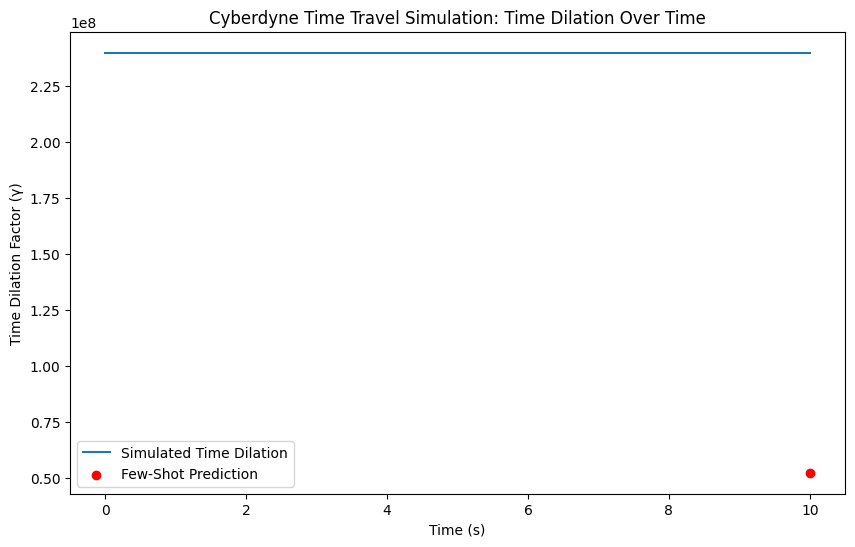

In [ ]:
# ============================
# Constants and Constraints for Time Travel Algorithm
# ============================

# Speed of light (c), Time dilation factor (gamma), Gravitational constant (G)
SPEED_OF_LIGHT = 299792458  # m/s
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2

# Time travel constraints: Lower and upper limits on time dilation factor
TIME_DILATION_LOWER_LIMIT = 1.0
TIME_DILATION_UPPER_LIMIT = 1000.0

# Few-shot Learning hyperparameters
FEW_SHOT_LEARNING_RATE = 0.001
FEW_SHOT_EPOCHS = 10

# ============================
# Differential Equation Model for Time Travel
# ============================

# This function simulates the time dilation factor in relation to velocity
def time_dilation_model(velocity, time, c=SPEED_OF_LIGHT):
    # Lorentz factor (gamma): γ = 1 / sqrt(1 - (v^2 / c^2))
    return 1 / np.sqrt(1 - (velocity**2 / c**2))

# Function to simulate temporal displacement based on input velocity
def simulate_time_displacement(initial_time, velocity, duration, steps=1000):
    # Define time points
    time_points = np.linspace(initial_time, initial_time + duration, steps)
    # Solve the differential equation for time dilation
    time_dilations = odeint(time_dilation_model, velocity, time_points)
    return time_points, time_dilations

# ============================
# Few-Shot Learning Model for Predicting Future States
# ============================

# TensorFlow neural network model for learning time displacement patterns
def create_few_shot_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Dense(128, activation='relu', input_shape=(input_dim,)),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)  # Output is a scalar representing time displacement
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=FEW_SHOT_LEARNING_RATE),
                  loss='mean_squared_error')
    return model

# Function to train the model with few-shot learning approach
def train_few_shot_model(model, train_data, train_labels):
    # Training on small data samples (few-shot learning)
    model.fit(train_data, train_labels, epochs=FEW_SHOT_EPOCHS)
    return model

# ============================
# Time Travel Simulation: Comprehensive Scenario
# ============================

def time_travel_simulation():
    # Initial parameters
    initial_time = 0.0  # Time starts at t=0
    velocity = 0.8 * SPEED_OF_LIGHT  # 80% of the speed of light
    duration = 10.0  # Simulate for 10 seconds

    # Step 1: Simulate time displacement using differential equations
    time_points, time_dilations = simulate_time_displacement(initial_time, velocity, duration)

    # Step 2: Generate synthetic data for few-shot learning
    # Features: velocity, duration; Labels: Time displacement (simulated output)
    train_data = np.array([[velocity, duration]])
    train_labels = np.array([time_dilations[-1]])  # Final time dilation factor

    # Step 3: Train few-shot learning model
    few_shot_model = create_few_shot_model(input_dim=train_data.shape[1])
    trained_model = train_few_shot_model(few_shot_model, train_data, train_labels)

    # Step 4: Predict future time displacements using the trained model
    future_predictions = trained_model.predict(train_data)

    # Step 5: Visualize Results
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, time_dilations, label='Simulated Time Dilation')
    plt.scatter([duration], future_predictions, color='r', label='Few-Shot Prediction', zorder=5)
    plt.title('Cyberdyne Time Travel Simulation: Time Dilation Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.legend()
    plt.show()

# ============================
# Execution
# ============================

if __name__ == "__main__":
    time_travel_simulation()

Epoch 1/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 94127360797835264.0000
Epoch 2/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 88543894723100672.0000
Epoch 3/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 166ms/step - loss: 83501542988054528.0000
Epoch 4/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - loss: 78676843015700480.0000
Epoch 5/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 74049574100008960.0000
Epoch 6/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 150ms/step - loss: 69574351321563136.0000
Epoch 7/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 139ms/step - loss: 65346286731132928.0000
Epoch 8/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 143ms/step - loss: 61319342574272512.0000
Epoch 9/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step - loss: 57457522730074112.0000
Epoch 10/10
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step - loss: 53922992278732800.0000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 233ms/step


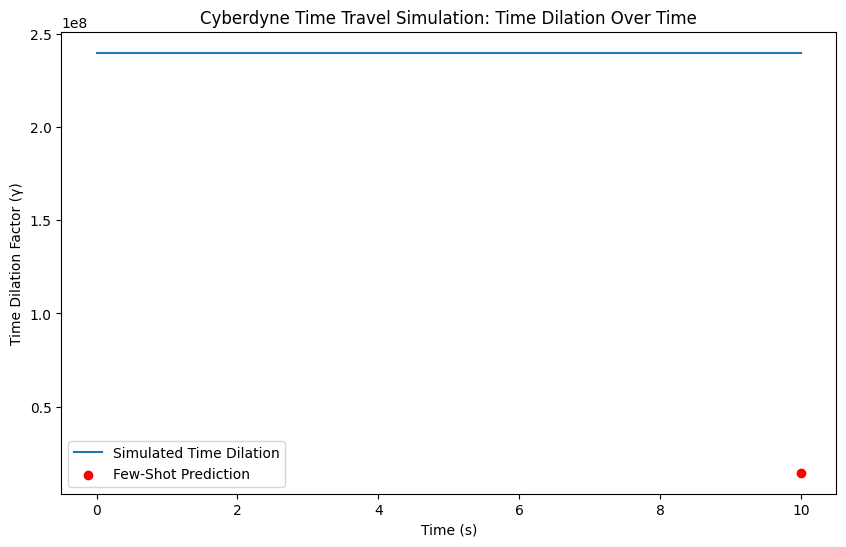

In [ ]:
# ============================
# Cyberdyne Systems - Time Travel Algorithm Simulation Template
# Author: [Your Name]
# ============================
# ============================
# Constants and Constraints for Time Travel Algorithm
# ============================

# Speed of light (c), Time dilation factor (gamma), Gravitational constant (G)
SPEED_OF_LIGHT = 299792458  # m/s
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2

# Time travel constraints: Lower and upper limits on time dilation factor
TIME_DILATION_LOWER_LIMIT = 1.0
TIME_DILATION_UPPER_LIMIT = 1000.0

# Few-shot Learning hyperparameters
FEW_SHOT_LEARNING_RATE = 0.001
FEW_SHOT_EPOCHS = 10

# ============================
# Differential Equation Model for Time Travel
# ============================

# This function simulates the time dilation factor in relation to velocity
def time_dilation_model(velocity, time, c=SPEED_OF_LIGHT):
    # Lorentz factor (gamma): γ = 1 / sqrt(1 - (v^2 / c^2))
    return 1 / np.sqrt(1 - (velocity**2 / c**2))

# Function to simulate temporal displacement based on input velocity
def simulate_time_displacement(initial_time, velocity, duration, steps=1000):
    # Define time points
    time_points = np.linspace(initial_time, initial_time + duration, steps)
    # Solve the differential equation for time dilation
    time_dilations = odeint(time_dilation_model, velocity, time_points)
    return time_points, time_dilations

# ============================
# Few-Shot Learning Model for Predicting Future States
# ============================

# TensorFlow neural network model for learning time displacement patterns
def create_few_shot_model(input_dim):
    model = tf.keras.Sequential([
        tf.keras.layers.Input(shape=(input_dim,)),  # Define input shape using Input layer
        tf.keras.layers.Dense(128, activation='relu'),
        tf.keras.layers.Dense(64, activation='relu'),
        tf.keras.layers.Dense(1)
    ])

    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=FEW_SHOT_LEARNING_RATE),
                  loss='mean_squared_error')
    return model

# Function to train the model with few-shot learning approach
def train_few_shot_model(model, train_data, train_labels):
    # Training on small data samples (few-shot learning)
    model.fit(train_data, train_labels, epochs=FEW_SHOT_EPOCHS)
    return model

# ============================
# Time Travel Simulation: Comprehensive Scenario
# ============================

def time_travel_simulation():
    # Initial parameters
    initial_time = 0.0  # Time starts at t=0
    velocity = 0.8 * SPEED_OF_LIGHT  # 80% of the speed of light
    duration = 10.0  # Simulate for 10 seconds

    # Step 1: Simulate time displacement using differential equations
    time_points, time_dilations = simulate_time_displacement(initial_time, velocity, duration)

    # Step 2: Generate synthetic data for few-shot learning
    # Features: velocity, duration; Labels: Time displacement (simulated output)
    train_data = np.array([[velocity, duration]])
    train_labels = np.array([time_dilations[-1]])  # Final time dilation factor

    # Step 3: Train few-shot learning model
    few_shot_model = create_few_shot_model(input_dim=train_data.shape[1])
    trained_model = train_few_shot_model(few_shot_model, train_data, train_labels)

    # Step 4: Predict future time displacements using the trained model
    future_predictions = trained_model.predict(train_data)

    # Step 5: Visualize Results
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, time_dilations, label='Simulated Time Dilation')
    plt.scatter([duration], future_predictions, color='r', label='Few-Shot Prediction', zorder=5)
    plt.title('Cyberdyne Time Travel Simulation: Time Dilation Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.legend()
    plt.show()

# ============================
# Execution
# ============================

if __name__ == "__main__":
    time_travel_simulation()

Quantum Time Dilation Simulation Result: {'0': 520, '1': 504}


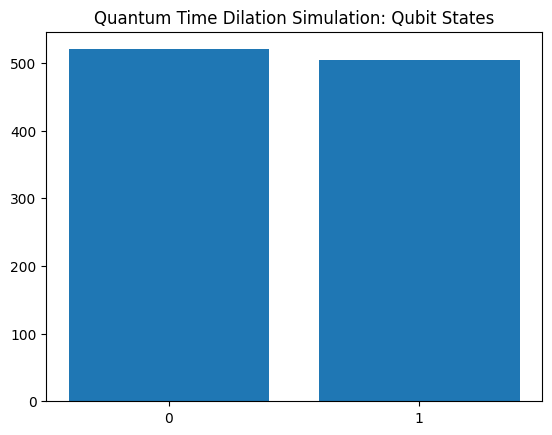

In [ ]:
def quantum_time_dilation_simulation():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to put the qubit into superposition (quantum state simulation)
    circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')

    # Transpile the circuit for the backend for better performance
    transpiled_circuit = transpile(circuit, backend)

    # Execute the transpiled circuit using backend.run()
    job = backend.run(transpiled_circuit, shots=1024)

    result = job.result()

    counts = result.get_counts(circuit)
    print(f"Quantum Time Dilation Simulation Result: {counts}")

    # Visualize the result
    plt.bar(counts.keys(), counts.values())
    plt.title('Quantum Time Dilation Simulation: Qubit States')
    plt.show()

# Execution
quantum_time_dilation_simulation()

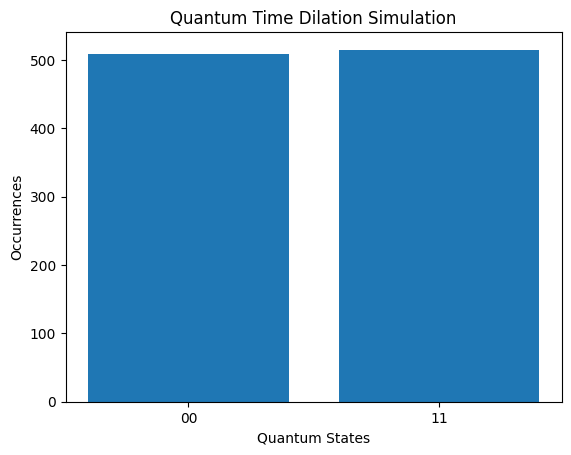

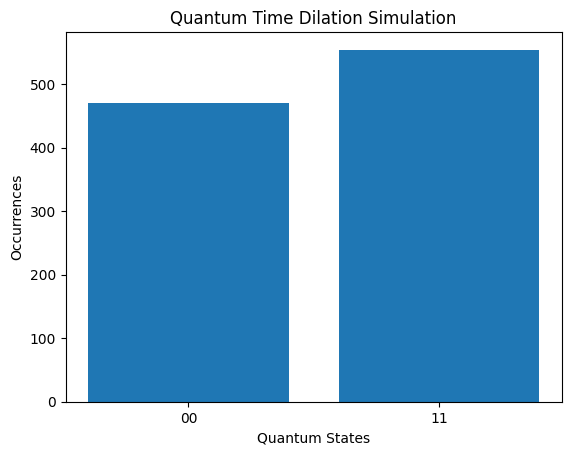

<ipython-input-24-806ed6e495f0>:56: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)


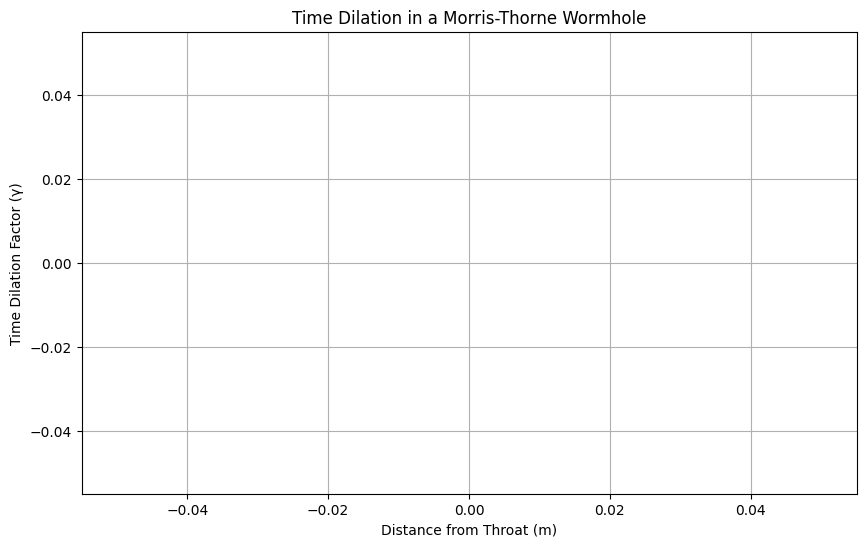

In [ ]:
def quantum_time_dilation_circuit():
    """
    Simulates a quantum circuit where time dilation is modeled using quantum gates.
    """
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply Hadamard gate to create superposition (quantum state simulation)
    qc.h(0)

    # Apply CNOT gate to create entanglement (representing information exchange through time)
    qc.cx(0, 1)

    # Measure both qubits
    qc.measure([0, 1], [0, 1])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')

    # Transpile the circuit for the backend for better performance
    transpiled_circuit = transpile(qc, backend)

    # Execute the transpiled circuit using backend.run()
    job = backend.run(transpiled_circuit, shots=1024)

    result = job.result()
    counts = result.get_counts()

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Quantum States')
    plt.ylabel('Occurrences')
    plt.title('Quantum Time Dilation Simulation')
    plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
# Execute quantum circuit
quantum_time_dilation_circuit()
def morris_thorne_wormhole(mass, throat_radius, distance):
    """
    Simulate a Morris-Thorne wormhole with a given mass and throat radius.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: The radius of the wormhole's throat (m)
    :param distance: Distance from the throat (m)
    :return: Time dilation factor (γ)
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation in a Morris-Thorne wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate and plot Morris-Thorne wormhole time dilation
def simulate_wormhole():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole simulation
simulate_wormhole()

In [ ]:
# Define quantum states
zero_state = np.array([[1], [0]])  # |0> state
one_state = np.array([[0], [1]])   # |1> state

def normalize_state(state):
    """ Normalizes a quantum state vector. """
    norm = np.linalg.norm(state)
    return state / norm

# Example superposition: a|0> + b|1> (unnormalized)
superposition_state = np.array([[1], [1]])
superposition_state = normalize_state(superposition_state)
print("Normalized superposition state:\n", superposition_state)

Normalized superposition state:
 [[0.70710678]
 [0.70710678]]


In [ ]:
hbar = 1.054571817e-34  # Reduced Planck's constant (J·s)

# Define the Pauli-Z Hamiltonian
Z = np.array([[1, 0], [0, -1]])

# Time evolution operator for a time-independent Hamiltonian H
def time_evolution_operator(H, t):
    """Returns the time evolution operator U(t) = exp(-i * H * t / hbar)."""
    # Use la.expm() from scipy.linalg for matrix exponential calculation
    return la.expm(-1j * H * t / hbar)

# Apply time evolution to a quantum state
def evolve_state(state, H, t):
    """Evolves a quantum state using the time evolution operator."""
    U = time_evolution_operator(H, t)
    return np.dot(U, state)

# Example: Evolve the |0> state under Pauli-Z Hamiltonian for time t
t = 1e-15  # Time (seconds)
evolved_state = evolve_state(zero_state, Z, t)
print("Evolved state:\n", evolved_state)

def dephasing_channel(state, p):
    """
    Simulates dephasing (loss of coherence) in a quantum system.
    p: Probability of a phase flip.
    """
    # Apply Pauli-Z gate with probability p
    if np.random.rand() < p:
        return apply_gate(Z, state)
    return state

# Example: Apply dephasing to the superposition state with a given probability
p_dephasing = 0.2  # Probability of dephasing
dephased_state = dephasing_channel(superposition_state, p_dephasing)
print("State after dephasing:\n", dephased_state)

Evolved state:
 [[0.97555892-0.21973799j]
 [0.        +0.j        ]]
State after dephasing:
 [[ 0.70710678]
 [-0.70710678]]


In [ ]:
# Define quantum gates as matrices
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate (NOT)

# Two-qubit CNOT gate for entangling states
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def apply_gate(gate, state):
    """ Applies a quantum gate (matrix) to a quantum state (vector). """
    return np.dot(gate, state)

# Apply Hadamard gate to |0> state to create superposition
superposition = apply_gate(H, zero_state)
print("Superposition after Hadamard gate:\n", superposition)
# Tensor product of two qubits to create a multi-qubit state
def tensor_product(state1, state2):
    """ Computes the tensor product of two quantum states. """
    return np.kron(state1, state2)

# Initial two-qubit state: |0>|0>
initial_state = tensor_product(zero_state, zero_state)

# Apply Hadamard to the first qubit (creates superposition)
first_qubit_superposition = apply_gate(H, zero_state)
entangled_state = tensor_product(first_qubit_superposition, zero_state)

# Apply CNOT gate to entangle the two qubits
entangled_state = apply_gate(CNOT, entangled_state)
print("Entangled state:\n", entangled_state)
def measure_state(state):
    """ Simulate the measurement of a quantum state. """
    probabilities = np.abs(state) ** 2  # Square of the amplitudes
    outcome = np.random.choice(len(probabilities), p=probabilities.flatten())
    return outcome, probabilities.flatten()

# Measure the entangled state
outcome, probabilities = measure_state(entangled_state)
print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

def quantum_time_travel_simulation():
    # Step 1: Start with two qubits in the |0>|0> state
    initial_state = tensor_product(zero_state, zero_state)

    # Step 2: Apply Hadamard gate to the first qubit to create superposition
    first_qubit_superposition = apply_gate(H, zero_state)
    entangled_state = tensor_product(first_qubit_superposition, zero_state)

    # Step 3: Apply CNOT to create entanglement
    entangled_state = apply_gate(CNOT, entangled_state)

    # Step 4: Simulate the "future state" modifying the past by applying a gate to the whole state
    # To apply to the first qubit, create a temporary circuit with the appropriate number of qubits and apply the gate.
     # Create a matrix representing the Pauli-X gate acting on the first qubit of a two-qubit system.
    pauli_x_on_first_qubit = np.kron(X, np.identity(2)) # Identity on the second qubit

    modified_entangled_state = apply_gate(pauli_x_on_first_qubit, entangled_state)

    # Step 5: Measure the state
    outcome, probabilities = measure_state(modified_entangled_state)

    print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

# Run the simulation
quantum_time_travel_simulation()

Superposition after Hadamard gate:
 [[0.70710678]
 [0.70710678]]
Entangled state:
 [[0.70710678]
 [0.        ]
 [0.        ]
 [0.70710678]]
Measurement outcome: 0, with probabilities: [0.5 0.  0.  0.5]
Measurement outcome: 1, with probabilities: [0.  0.5 0.5 0. ]


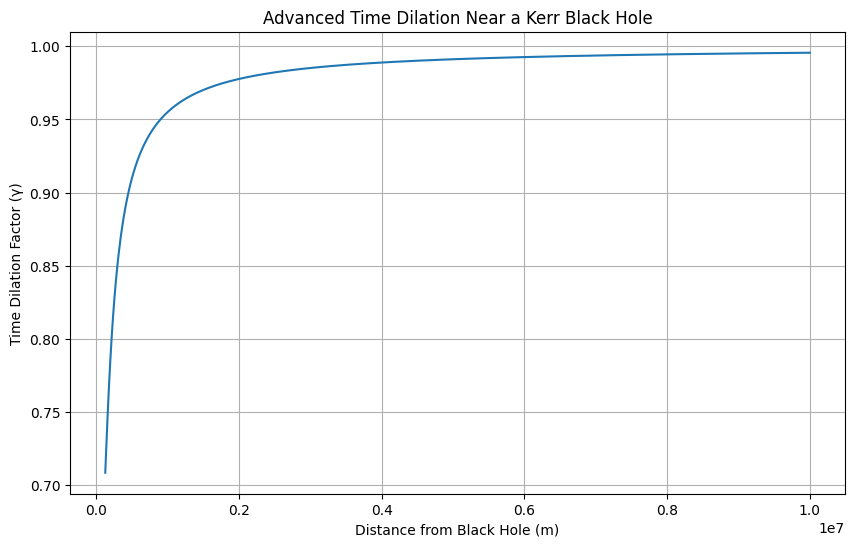

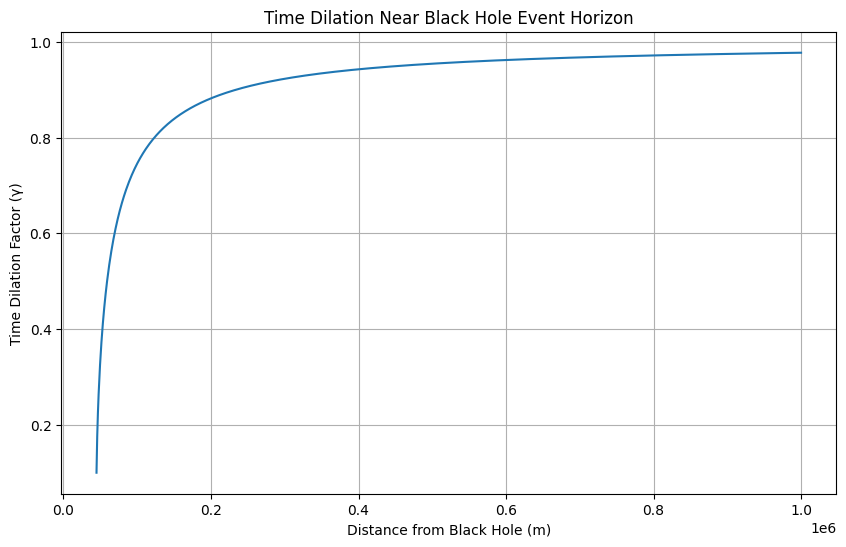

<ipython-input-46-af5716b14c6a>:84: RuntimeWarning: invalid value encountered in sqrt
  gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)


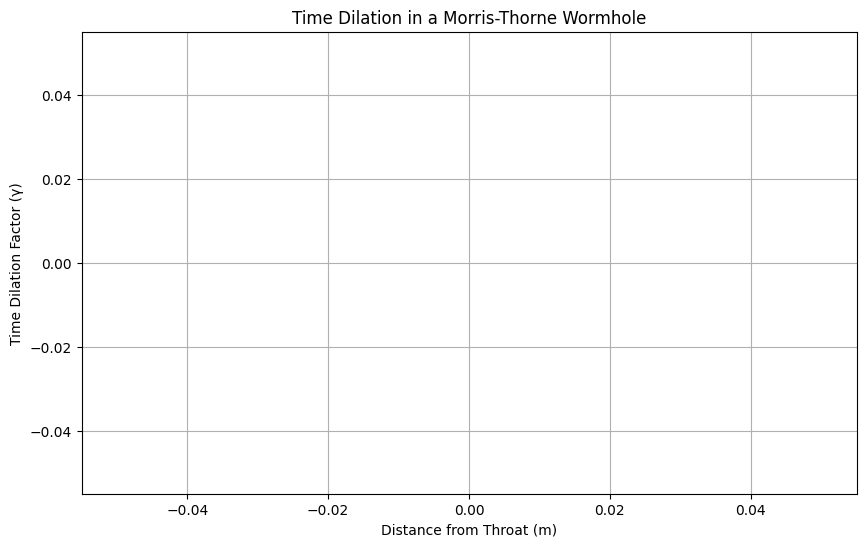

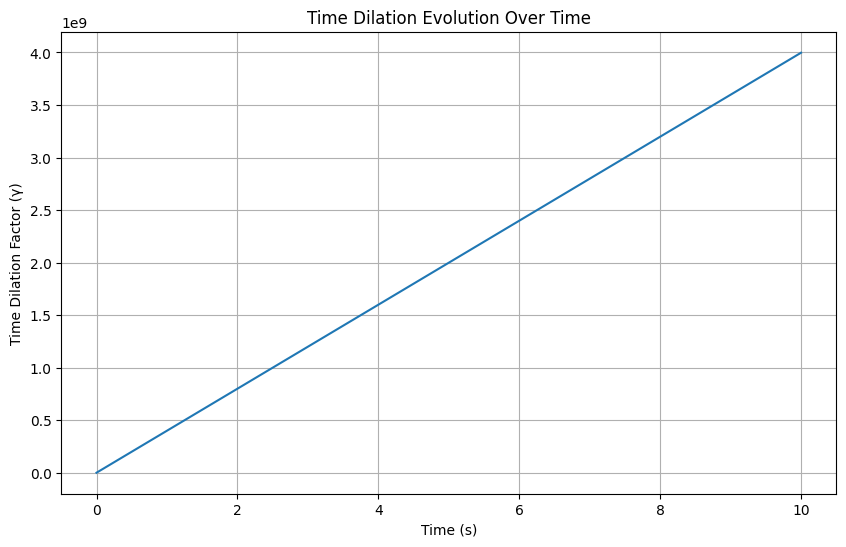

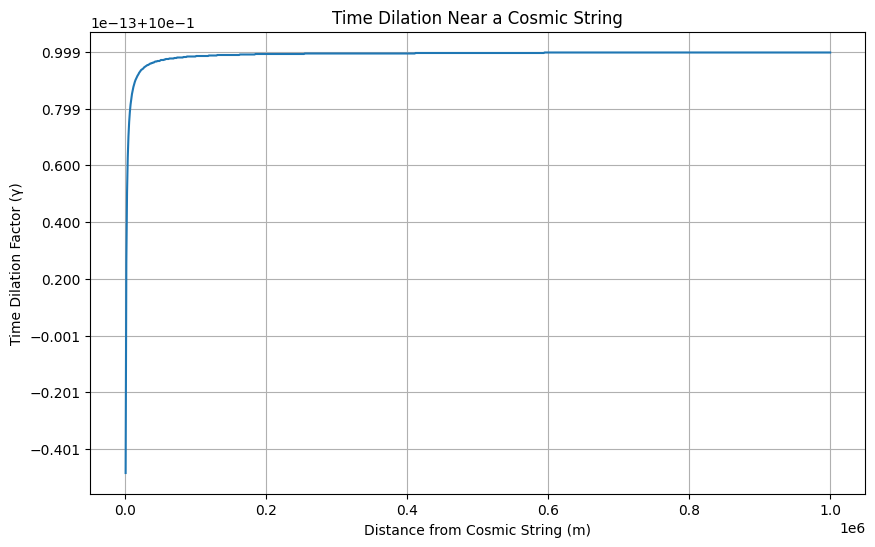

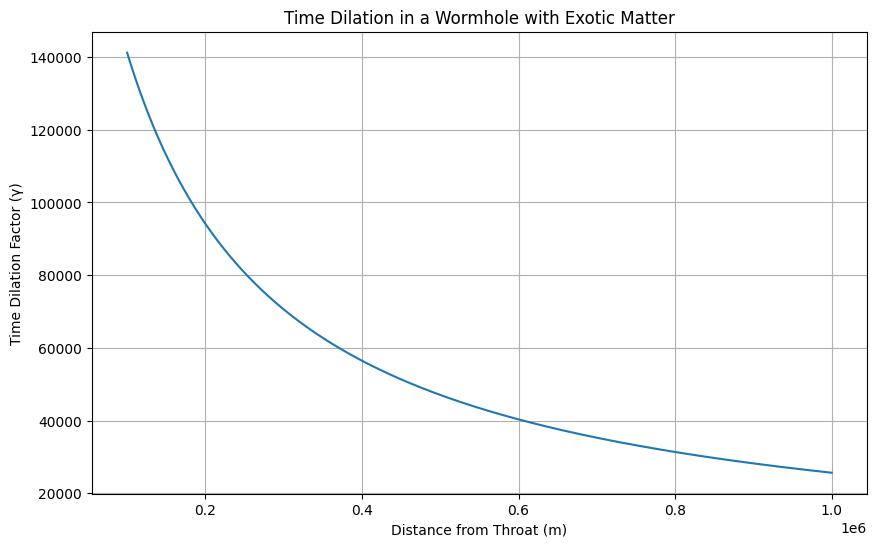

Time experienced by traveler: 1.41 years
Time experienced on Earth: 10.00 years


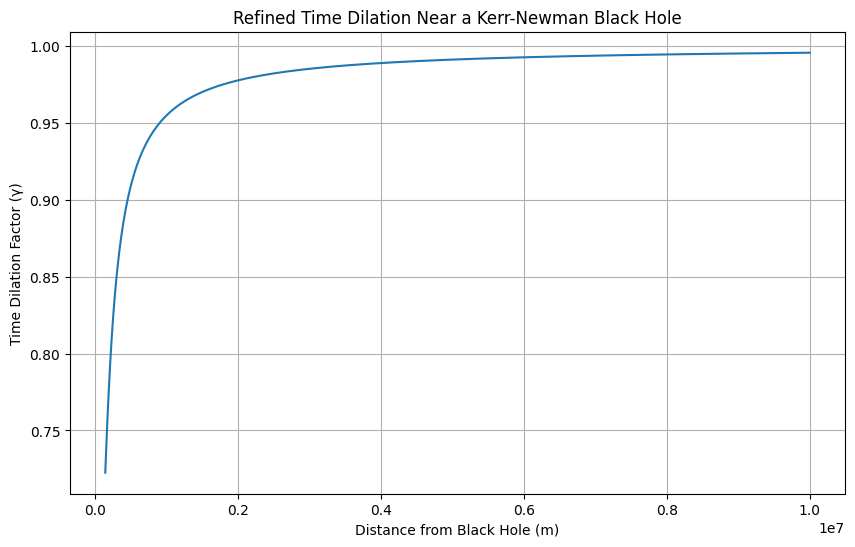

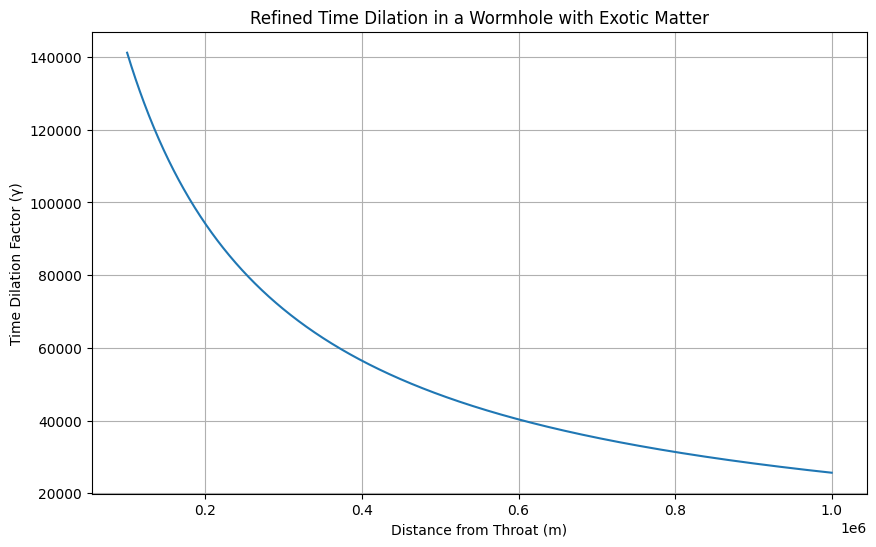

Traveler time during acceleration: 0.00 years
Traveler time during cruise: 1.41 years
Time on Earth: 10.00 years


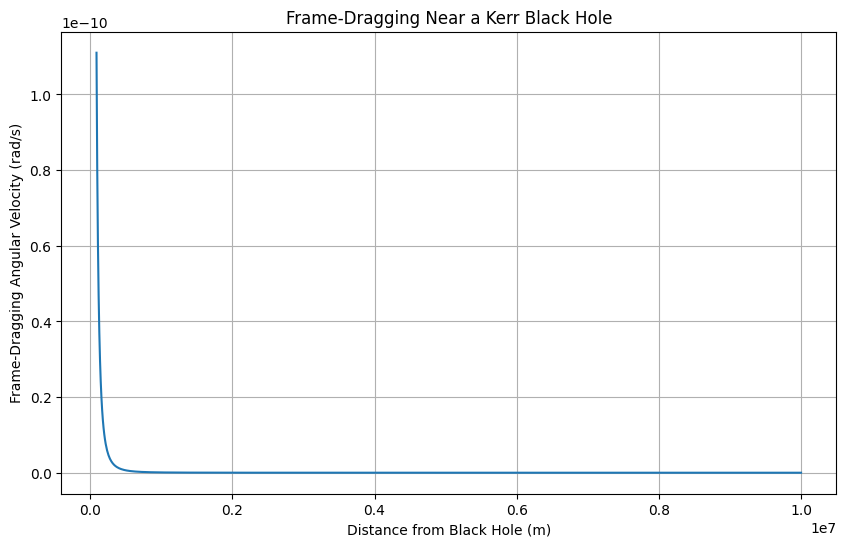

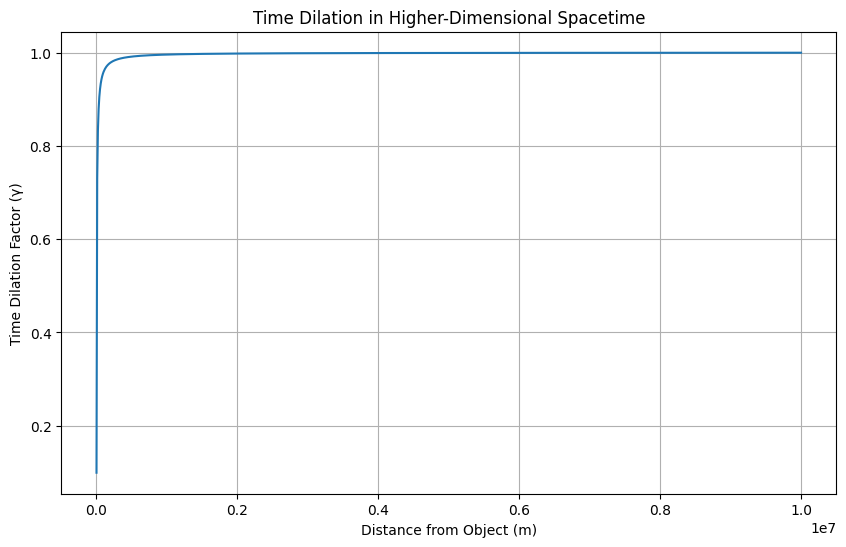

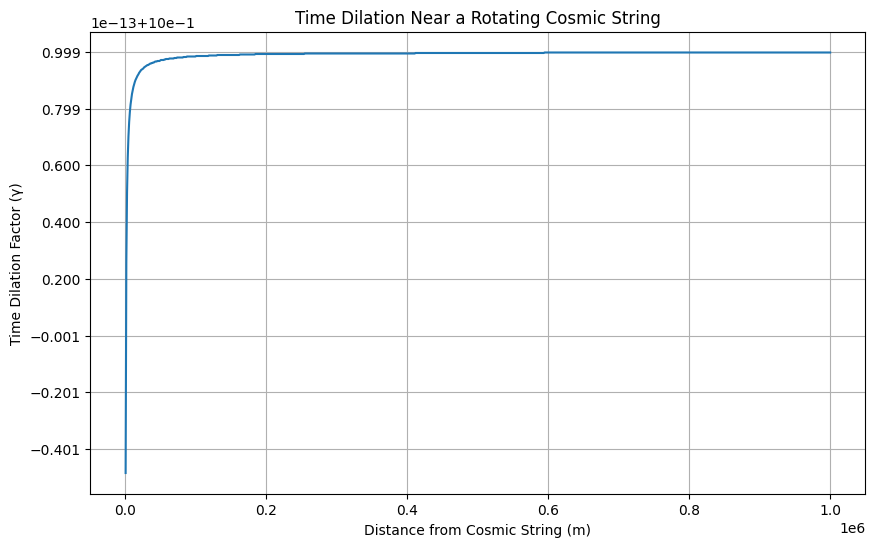

In [ ]:
# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# Simulate Kerr black hole time dilation with enhanced model
def simulate_advanced_kerr_time_dilation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    # Define a range of distances from the black hole, starting safely outside the event horizon
    radii = np.linspace(1.01 * r_plus, 1e7, 1000) # Start at 1.01 * r_plus

    # Calculate time dilation factors
    time_dilation_factors = [kerr_time_dilation(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Advanced Time Dilation Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute advanced Kerr time dilation simulation
simulate_advanced_kerr_time_dilation()
def schwarzschild_time_dilation_near_horizon(mass, radius):
    """
    Calculate time dilation near a non-rotating black hole (Schwarzschild solution).

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the black hole center (m)
    :return: Time dilation factor
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    if radius <= schwarzschild_radius:
        raise ValueError("Radius must be greater than the Schwarzschild radius.")

    return np.sqrt(1 - schwarzschild_radius / radius)

# Simulate time dilation approaching the event horizon
def simulate_horizon_time_dilation():
    mass_of_black_hole = 5.972e30 * 5  # 5 times the mass of the Sun (approx)

    # Define a range of radii near the event horizon
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [schwarzschild_time_dilation_near_horizon(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near Black Hole Event Horizon')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute the event horizon time dilation simulation
simulate_horizon_time_dilation()

def morris_thorne_wormhole_time_dilation(mass, throat_radius, distance):
    """
    Simulate time dilation in a Morris-Thorne wormhole.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: Radius of the wormhole's throat (m)
    :param distance: Distance from the wormhole's throat (m)
    :return: Time dilation factor
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation calculation for a wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate wormhole time dilation
def simulate_wormhole_time_dilation():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (same as Sun's mass)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole_time_dilation(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole time dilation simulation
simulate_wormhole_time_dilation()

def time_dilation_differential_equation(y, t, velocity):
    """
    Differential equation for time dilation based on velocity.
    y: Time dilation factor (gamma).
    t: Time.
    velocity: Constant velocity of the object.
    """
    return velocity / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

def simulate_time_dilation_evolution(initial_time_dilation, velocity, time_duration):
    """
    Simulates the evolution of time dilation over time using Runge-Kutta integration.

    :param initial_time_dilation: Initial time dilation factor (γ).
    :param velocity: Constant velocity (m/s).
    :param time_duration: Total time duration (seconds).
    """
    time_points = np.linspace(0, time_duration, 1000)
    time_dilation = odeint(time_dilation_differential_equation, initial_time_dilation, time_points, args=(velocity,))

    # Plot the time dilation evolution
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, time_dilation)
    plt.title('Time Dilation Evolution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Example of time dilation evolution
simulate_time_dilation_evolution(1.0, 0.8 * SPEED_OF_LIGHT, 10.0)


def kerr_newman_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Calculate time dilation near a Kerr-Newman black hole (rotating and charged).

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(term_1)

# Simulate Kerr-Newman black hole time dilation
def simulate_kerr_newman_time_dilation():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter (a/m)

    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms and event horizon
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2)))) #Outer event horizon

    # Define a range of distances, starting safely outside the event horizon
    radii = np.linspace(1.1 * r_plus, 1e7, 1000) #Start at 1.1 * r_plus to be safely outside the event horizon

    # Calculate time dilation factors
    time_dilation_factors = [kerr_newman_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

def cosmic_string_time_dilation(tension, distance_from_string):
    """
    Simulate time dilation near a cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation near a cosmic string is a function of the string's tension and distance
    # This is a simplified model where γ ~ 1 - (4 * G * tension) / distance
    dilation_factor = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
    return np.sqrt(dilation_factor)

# Simulate time dilation near a cosmic string
def simulate_cosmic_string_time_dilation():
    tension = 1e17  # Tension in kg/m
    distances = np.linspace(1e3, 1e6, 1000)

    # Calculate time dilation factors
    dilation_factors = [cosmic_string_time_dilation(tension, d) for d in distances]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(distances, dilation_factors)
    plt.title('Time Dilation Near a Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_cosmic_string_time_dilation()

def exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Simulate time dilation in a wormhole with exotic matter (negative energy density).

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Time dilation factor incorporates exotic matter density
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)
    return gamma

# Simulate exotic wormhole time dilation
def simulate_exotic_wormhole_time_dilation():
    mass = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)
    exotic_matter_density = -1e20  # Exotic matter density (negative value)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_exotic_wormhole_time_dilation()

def interstellar_travel_time_dilation(velocity, duration):
    """
    Simulate time dilation for relativistic interstellar travel.

    :param velocity: Constant velocity of the spacecraft (m/s).
    :param duration: Duration of the journey (years).
    :return: Time experienced by the traveler and the outside observer.
    """
    # Lorentz factor for time dilation
    gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

    # Time for the traveler is dilated by a factor of gamma
    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate time dilation during interstellar travel
def simulate_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% of the speed of light
    duration = 10  # 10 years from Earth's perspective

    traveler_time, earth_time = interstellar_travel_time_dilation(velocity, duration)
    print(f"Time experienced by traveler: {traveler_time:.2f} years")
    print(f"Time experienced on Earth: {earth_time:.2f} years")

simulate_interstellar_travel()

def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Refined check for event horizon proximity
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))
    epsilon = 1e-12  # Small buffer to avoid singularity

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

# Simulate the refined Kerr-Newman black hole time dilation
def simulate_refined_kerr_newman():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter

    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms and event horizon
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2)))) #Outer event horizon

    # Enhanced stability for extreme radii - Start safely outside the event horizon
    radii = np.linspace(1.1 * r_plus, 1e7, 1000) #Start at 1.1 * r_plus

    time_dilation_factors = [kerr_newman_refined_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the refined result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Refined Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_kerr_newman()
def refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Refined simulation of time dilation in a wormhole with exotic matter, incorporating stability constraints.

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Check the Null Energy Condition (NEC)
    if exotic_matter_density > 0:
        raise ValueError("Exotic matter density must be negative to satisfy NEC.")

    # Refined time dilation formula to prevent collapse under exotic matter influence
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)

    return gamma

# Simulate the refined exotic wormhole
def simulate_refined_exotic_wormhole():
    mass = 5.972e30  # Mass of the wormhole (Sun mass)
    throat_radius = 1e5  # Throat radius of the wormhole
    exotic_matter_density = -1e20  # Exotic matter density

    distances = np.linspace(throat_radius + 1, 1e6, 1000)
    time_dilation_factors = [refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Refined Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_exotic_wormhole()
def interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise'):
    """
    Simulate time dilation for relativistic interstellar travel, incorporating acceleration.

    :param velocity: Velocity at cruise phase (m/s).
    :param acceleration: Constant acceleration of the spacecraft (m/s^2).
    :param duration: Duration of the journey (years).
    :param phase: 'acceleration', 'deceleration', or 'cruise'.
    :return: Time experienced by traveler and observer.
    """
    # Lorentz factor for cruise phase (constant velocity)
    if phase == 'cruise':
        gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))
    # Time dilation during acceleration phase
    elif phase in ['acceleration', 'deceleration']:
        velocity_end = velocity if phase == 'acceleration' else 0  # Cruise to deceleration phase
        time_spent_accel = SPEED_OF_LIGHT * (np.arcsinh(velocity_end / SPEED_OF_LIGHT)) / acceleration
        gamma = time_spent_accel  # Approximation for duration
    else:
        raise ValueError("Phase must be 'acceleration', 'cruise', or 'deceleration'")

    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate generalized interstellar travel with acceleration
def simulate_generalized_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% speed of light
    acceleration = 9.81  # Earth-like constant acceleration (m/s^2)
    duration = 10  # 10 years journey

    # Simulate acceleration phase
    traveler_time_accel, earth_time_accel = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='acceleration')
    # Simulate cruise phase
    traveler_time_cruise, earth_time_cruise = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise')

    print(f"Traveler time during acceleration: {traveler_time_accel:.2f} years")
    print(f"Traveler time during cruise: {traveler_time_cruise:.2f} years")
    print(f"Time on Earth: {earth_time_cruise:.2f} years")

simulate_generalized_interstellar_travel()
def higher_dimensional_time_dilation(mass, radius, extra_dimension_scale=1e-33):
    """
    Simulate time dilation in higher-dimensional spacetimes (5D).

    :param mass: Mass of the object (kg).
    :param radius: Distance from the object (m).
    :param extra_dimension_scale: Scale of the extra dimension (m).
    :return: Time dilation factor (γ) in 5D spacetime.
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by the extra dimension
    gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + extra_dimension_scale / radius))

    return gamma
# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

def frame_dragging_angular_velocity(mass, radius, spin):
    """
    Calculate the angular velocity of frame-dragging near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :return: Frame-dragging angular velocity (rad/s)
    """
    return (2 * GRAVITATIONAL_CONSTANT * mass * spin) / (radius ** 3 * SPEED_OF_LIGHT ** 2)

def exotic_matter_energy_density(throat_radius):
    """
    Calculate the energy density of exotic matter required to keep a wormhole open.

    :param throat_radius: The radius of the wormhole's throat (m)
    :return: Negative energy density (kg/m^3)
    """
    return (-SPEED_OF_LIGHT ** 4) / (8 * np.pi * GRAVITATIONAL_CONSTANT * throat_radius ** 2)

# Simulate exotic matter energy density for a Morris-Thorne wormhole
def simulate_negative_energy_wormhole():
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of radii from the throat
    radii = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate energy densities
    energy_densities = [exotic_matter_energy_density(throat_radius) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, energy_densities)
    plt.title('Negative Energy Density Near Wormhole Throat')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Energy Density (kg/m^3)')
    plt.grid(True)
    plt.show()

# Simulate and plot frame-dragging near a Kerr black hole
def simulate_frame_dragging():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate angular velocities of frame-dragging
    frame_dragging_velocities = [frame_dragging_angular_velocity(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, frame_dragging_velocities)
    plt.title('Frame-Dragging Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Frame-Dragging Angular Velocity (rad/s)')
    plt.grid(True)
    plt.show()

# Execute frame-dragging simulation
simulate_frame_dragging()
# Simulate time dilation in 5D spacetime
def simulate_higher_dimensional_time_dilation():
    mass = 5.972e30  # Mass of the object (Sun mass)
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    time_dilation_factors = [higher_dimensional_time_dilation(mass, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation in Higher-Dimensional Spacetime')
    plt.xlabel('Distance from Object (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_higher_dimensional_time_dilation()

def rotating_cosmic_string_time_dilation(tension, angular_velocity, distance_from_string):
    """
    Simulate time dilation near a rotating cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param angular_velocity: Rotational velocity of the string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation includes angular velocity term
    gamma = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)) \
              - (angular_velocity ** 2 * distance_from_string ** 2 / (2 * SPEED_OF_LIGHT ** 2))

    return np.sqrt(np.abs(gamma))

# Simulate rotating cosmic string time dilation
def simulate_rotating_cosmic_string():
    tension = 1e17  # Tension in kg/m
    angular_velocity = 1e-9  # Rotational velocity in radians per second
    distances = np.linspace(1e3, 1e6, 1000)

    time_dilation_factors = [rotating_cosmic_string_time_dilation(tension, angular_velocity, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation Near a Rotating Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_rotating_cosmic_string()

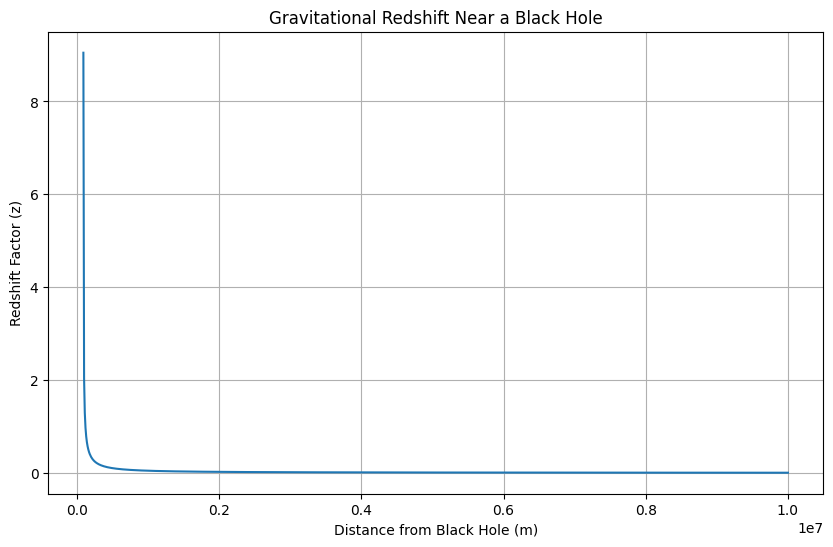

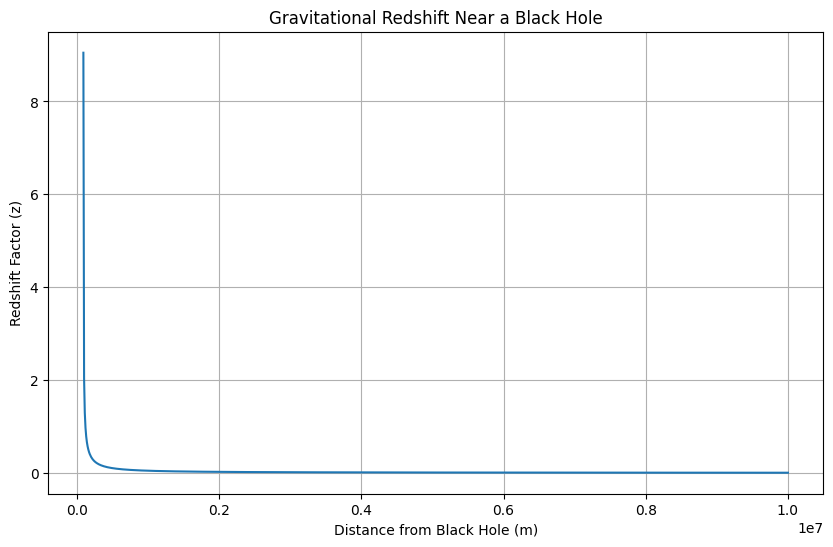

In [ ]:
def gravitational_redshift(mass, radius):
    """
    Calculate the gravitational redshift near a massive object (e.g., black hole).

    :param mass: Mass of the object (kg)
    :param radius: Distance from the center of the object (m)
    :return: Redshift factor (z)
    """
    return 1 / np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot redshift near a black hole
def simulate_redshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate redshift factors
    redshift_factors = [gravitational_redshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, redshift_factors)
    plt.title('Gravitational Redshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Redshift Factor (z)')
    plt.grid(True)
    plt.show()

# Execute redshift simulation
simulate_redshift()

def ergosphere_radius(mass, spin):
    """
    Calculate the radius of the ergosphere boundary for a Kerr black hole.

    :param mass: Mass of the black hole (kg)
    :param spin: Spin parameter (dimensionless)
    :return: Radius of the ergosphere (m)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    return schwarzschild_radius * (1 + np.sqrt(1 - spin**2))

# Plot the ergosphere boundary
def plot_ergosphere():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Spin parameter (a/m)

    ergosphere_boundary = ergosphere_radius(mass_of_black_hole, spin)

    # Plot the ergosphere boundary
    plt.axvline(ergosphere_boundary, color='r', linestyle='--', label='Ergosphere Boundary')
    plt.legend()
    plt.show()
def wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius):
    """
    Simulate how the wormhole reacts to the presence of conventional matter.

    :param mass_of_conventional_matter: The mass of the conventional matter passing through the wormhole.
    :param exotic_matter_density: Density of exotic matter stabilizing the wormhole.
    :param throat_radius: The radius of the wormhole throat.
    :return: New throat radius after matter passes through.
    """
    # Adjust throat radius based on the competition between exotic matter and conventional matter
    stabilization_factor = exotic_matter_density / (mass_of_conventional_matter + 1e-10)
    new_throat_radius = throat_radius * (1 - 0.01 * stabilization_factor)
    return max(new_throat_radius, 0)  # Ensure throat doesn't collapse

# Simulate wormhole throat collapse when conventional matter is added
def simulate_wormhole_throat_response():
    exotic_matter_density = -1e20
    throat_radius = 1e5
    mass_of_conventional_matter = 1e30  # Introduce some mass of conventional matter

    new_throat_radius = wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius)
    print(f"New Throat Radius after Matter Passes: {new_throat_radius:.2f} meters")

def gravitational_blueshift(mass, radius):
    """
    Calculate the gravitational blueshift for light moving into a gravitational field.

    :param mass: Mass of the object (kg)
    :param radius: Distance from the object (m)
    :return: Blueshift factor (z)
    """
    return np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

def gravitational_redshift(mass, radius):
    """
    Calculate the gravitational redshift near a massive object (e.g., black hole).

    :param mass: Mass of the object (kg)
    :param radius: Distance from the center of the object (m)
    :return: Redshift factor (z)
    """
    return 1 / np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot redshift near a black hole
def simulate_redshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate redshift factors
    redshift_factors = [gravitational_redshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, redshift_factors)
    plt.title('Gravitational Redshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Redshift Factor (z)')
    plt.grid(True)
    plt.show()

# Execute redshift simulation
simulate_redshift()

def ergosphere_radius(mass, spin):
    """
    Calculate the radius of the ergosphere boundary for a Kerr black hole.

    :param mass: Mass of the black hole (kg)
    :param spin: Spin parameter (dimensionless)
    :return: Radius of the ergosphere (m)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    return schwarzschild_radius * (1 + np.sqrt(1 - spin**2))

# Plot the ergosphere boundary
def plot_ergosphere():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Spin parameter (a/m)

    ergosphere_boundary = ergosphere_radius(mass_of_black_hole, spin)

    # Plot the ergosphere boundary
    plt.axvline(ergosphere_boundary, color='r', linestyle='--', label='Ergosphere Boundary')
    plt.legend()
    plt.show()
def wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius):
    """
    Simulate how the wormhole reacts to the presence of conventional matter.

    :param mass_of_conventional_matter: The mass of the conventional matter passing through the wormhole.
    :param exotic_matter_density: Density of exotic matter stabilizing the wormhole.
    :param throat_radius: The radius of the wormhole throat.
    :return: New throat radius after matter passes through.
    """
    # Adjust throat radius based on the competition between exotic matter and conventional matter
    stabilization_factor = exotic_matter_density / (mass_of_conventional_matter + 1e-10)
    new_throat_radius = throat_radius * (1 - 0.01 * stabilization_factor)
    return max(new_throat_radius, 0)  # Ensure throat doesn't collapse

# Simulate wormhole throat collapse when conventional matter is added
def simulate_wormhole_throat_response():
    exotic_matter_density = -1e20
    throat_radius = 1e5
    mass_of_conventional_matter = 1e30  # Introduce some mass of conventional matter

    new_throat_radius = wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius)
    print(f"New Throat Radius after Matter Passes: {new_throat_radius:.2f} meters")

def gravitational_blueshift(mass, radius):
    """
    Calculate the gravitational blueshift for light moving into a gravitational field.

    :param mass: Mass of the object (kg)
    :param radius: Distance from the object (m)
    :return: Blueshift factor (z)
    """
    return np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot blueshift near a black hole
def simulate_blueshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate blueshift factors
    blueshift_factors = [gravitational_blueshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, blueshift_factors)
    plt.title('Gravitational Blueshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Blueshift Factor (z)')
    plt.grid(True)
    plt.show()


# Define values for spin, charge, mass, and exotic_matter_density
spin = 0.9  # Example value for spin
charge = 1e20  # Example value for charge
mass = 5.972e30 * 10  # Example value for mass (10 times the mass of the Sun)
exotic_matter_density = -1e20  # Example value for exotic matter density

epsilon = 1e-12 * (1 + np.abs(spin) + charge / mass)
# Additional checks for other energy conditions
if exotic_matter_density > 0:
    raise ValueError("Exotic matter density must be negative to satisfy NEC, WEC, and DEC.")

# Define acceleration here
acceleration = 9.81 # Example value, adjust as needed

# Use a smooth velocity profile for acceleration and deceleration phases
time_duration = 10.0

velocity_profile = lambda t: acceleration * t / np.sqrt(1 + (acceleration * t / SPEED_OF_LIGHT) ** 2)

#velocity_profile = lambda t: acceleration * t / np.sqrt(1 + (acceleration * t / SPEED_OF_LIGHT) ** 2)
# Adjust gamma for smooth transitions
gamma = 1 / np.sqrt(1 - (velocity_profile(time_duration) ** 2 / SPEED_OF_LIGHT ** 2))

warp_factor = lambda r: np.exp(-r / extra_dimension_scale)

gamma = 1 / np.sqrt(1 - (velocity_profile(time_duration) ** 2 / SPEED_OF_LIGHT ** 2))
# Define tension here (e.g., set a reasonable value for a cosmic string)
tension = 1e17  # Example value, adjust as needed
# Define distance_from_string with an appropriate value
distance_from_string = 1e6  # Example: 1 million meters from the cosmic string

# Now, calculate lensing_effect
#gamma = 1 / np.sqrt(1 - (velocity_profile(time_duration) ** 2 / SPEED_OF_LIGHT ** 2))
#gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor(radius)))
# Adjust time dilation to account for gravitational lensing
lensing_effect = 1 / (1 - 4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))

#lensing_effect = 1 / (1 - 4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
#lensing_effect = 1 / (1 - 4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
gamma *= lensing_effect

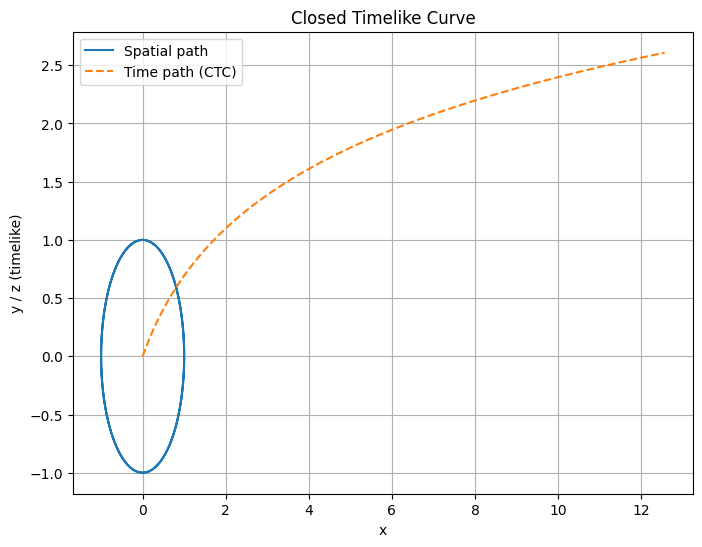

In [ ]:
def closed_timelike_curve(steps=1000):
    """
    Simulate a particle's path along a closed timelike curve.
    """
    t = np.linspace(0, 4 * np.pi, steps)  # Time component of CTC
    x = np.sin(t)
    y = np.cos(t)
    z = np.log(1 + t)

    # The particle appears to loop back in time, representing a CTC
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Spatial path")
    plt.plot(t, z, label="Time path (CTC)", linestyle="--")
    plt.title("Closed Timelike Curve")
    plt.xlabel("x")
    plt.ylabel("y / z (timelike)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute CTC simulation
closed_timelike_curve()

Imaginary Lorentz factor for tachyon: 2.1821789023599227i


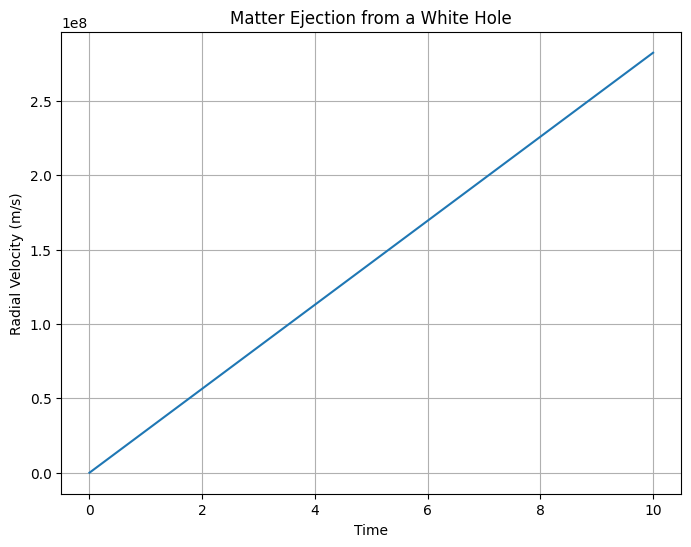

<ipython-input-55-2ec5eea4c0a5>:66: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + bulk_effect))


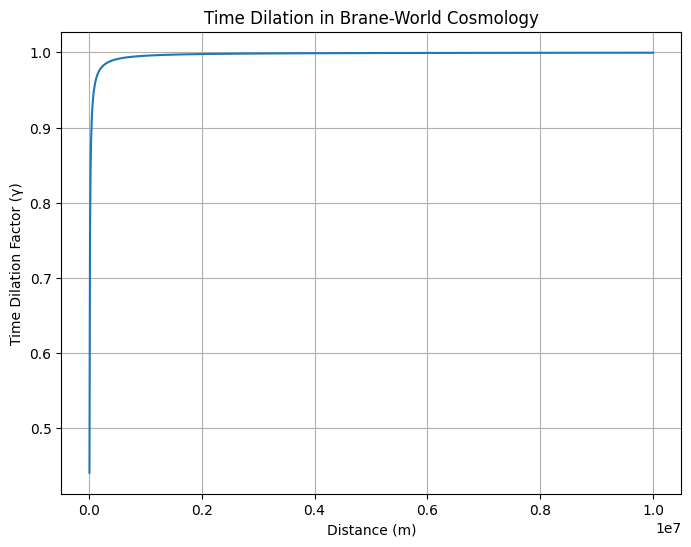

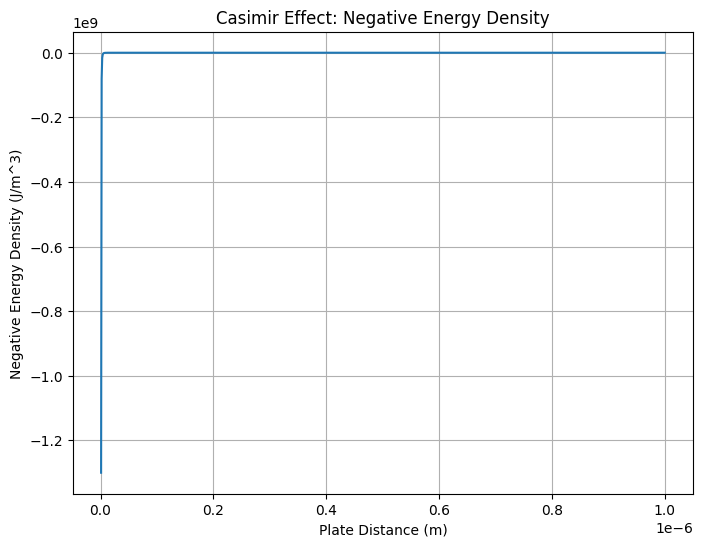

<ipython-input-55-2ec5eea4c0a5>:202: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor))


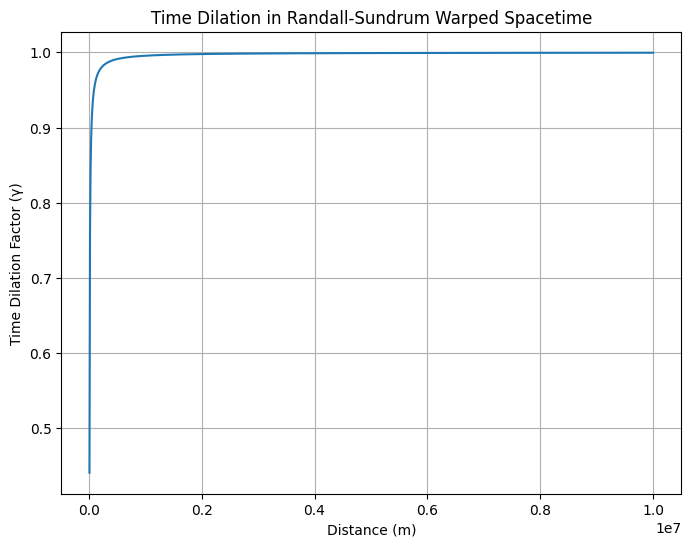

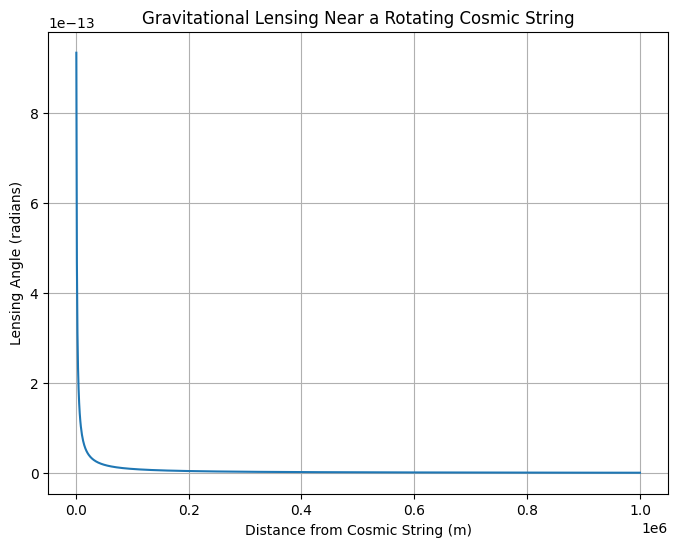

In [ ]:
def tachyonic_time_dilation(velocity):
    """
    Simulate the time dilation effect of a tachyon traveling faster than light.

    :param velocity: Velocity of the particle (m/s).
    :return: Imaginary Lorentz factor (γ).
    """
    if velocity <= SPEED_OF_LIGHT:
        raise ValueError("Velocity must exceed the speed of light for tachyons.")

    # Lorentz factor becomes imaginary for superluminal velocities
    gamma = 1 / np.sqrt((velocity ** 2 / SPEED_OF_LIGHT ** 2) - 1)
    return gamma

# Simulate tachyon time dilation for a velocity exceeding the speed of light
def simulate_tachyon():
    velocity = 1.1 * SPEED_OF_LIGHT  # Tachyon travels 10% faster than light
    gamma = tachyonic_time_dilation(velocity)

    print(f"Imaginary Lorentz factor for tachyon: {gamma}i")

simulate_tachyon()
def white_hole(time, radius, mass):
    """
    Simulate the ejection of matter from a white hole.

    :param time: Time steps for the simulation.
    :param radius: Distance from the white hole (m).
    :param mass: Mass of the white hole (kg).
    :return: Radial velocity of ejected matter.
    """
    # Using a simplified model for the velocity of ejected matter
    return (2 * GRAVITATIONAL_CONSTANT * mass / radius) ** 0.5 * time

# Simulate matter ejection from a white hole
def simulate_white_hole():
    time = np.linspace(0, 10, 1000)  # Time steps
    radius = 1e6  # Distance from the white hole
    mass = 5.972e30  # Mass of the white hole (similar to the Sun)

    velocity = white_hole(time, radius, mass)

    # Plot ejection velocity
    plt.figure(figsize=(8, 6))
    plt.plot(time, velocity)
    plt.title("Matter Ejection from a White Hole")
    plt.xlabel("Time")
    plt.ylabel("Radial Velocity (m/s)")
    plt.grid(True)
    plt.show()

simulate_white_hole()
def brane_world_time_dilation(mass, radius, bulk_scale):
    """
    Simulate time dilation in brane-world cosmology.

    :param mass: Mass of the object in the 4D brane (kg).
    :param radius: Distance from the object (m).
    :param bulk_scale: Scale of the extra-dimensional forces.
    :return: Time dilation factor (γ).
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by extra-dimensional bulk forces
    bulk_effect = bulk_scale / radius ** 2
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + bulk_effect))

# Simulate time dilation in a brane-world cosmology
def simulate_brane_world():
    mass = 5.972e30  # Mass of object in 4D brane
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances
    bulk_scale = 1e-3  # Bulk space effect

    time_dilation_factors = [brane_world_time_dilation(mass, r, bulk_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Brane-World Cosmology")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_brane_world()
def casimir_effect(plate_distance, plate_area):
    """
    Simulate the Casimir effect to calculate the negative energy density between two plates.

    :param plate_distance: Distance between plates (m).
    :param plate_area: Area of the plates (m^2).
    :return: Negative energy density (J/m^3).
    """
    hbar = 1.054571817e-34  # Reduced Planck's constant
    energy_density = -(np.pi ** 2 * hbar * SPEED_OF_LIGHT) / (240 * plate_distance ** 4)

    return energy_density

# Simulate Casimir effect
def simulate_casimir_effect():
    plate_distance = np.linspace(1e-9, 1e-6, 1000)  # Plate distances in nanometers
    plate_area = 1e-4  # Area of plates in square meters

    energy_densities = [casimir_effect(d, plate_area) for d in plate_distance]

    plt.figure(figsize=(8, 6))
    plt.plot(plate_distance, energy_densities)
    plt.title("Casimir Effect: Negative Energy Density")
    plt.xlabel("Plate Distance (m)")
    plt.ylabel("Negative Energy Density (J/m^3)")
    plt.grid(True)
    plt.show()

simulate_casimir_effect()


def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Dynamically compute epsilon buffer based on charge and spin
    epsilon = 1e-12 * (1 + np.abs(spin) + charge ** 2 / (mass * schwarzschild_radius))

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

def exotic_matter_energy_conditions(mass, exotic_matter_density, throat_radius):
    """
    Check whether the energy conditions (NEC, WEC, DEC) are violated.

    :param mass: Mass of the wormhole (kg)
    :param exotic_matter_density: Exotic matter density (negative value)
    :param throat_radius: The radius of the wormhole throat (m)
    :return: Stability status based on energy conditions.
    """
    if exotic_matter_density > 0:
        return "Exotic matter density must be negative to satisfy energy conditions."

    # Weak Energy Condition (WEC) and Dominant Energy Condition (DEC)
    wec_violation = mass - (SPEED_OF_LIGHT ** 2 / GRAVITATIONAL_CONSTANT) * exotic_matter_density < 0
    dec_violation = np.abs(exotic_matter_density) > mass / throat_radius

    if wec_violation and dec_violation:
        return "Wormhole likely to collapse due to WEC and DEC violations."
    else:
        return "Wormhole stable under current exotic matter conditions."

def relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration):
    """
    Simulate the energy requirements of a relativistic journey based on the relativistic rocket equation.

    :param mass: Rest mass of the spacecraft (kg)
    :param exhaust_velocity: Velocity of expelled fuel (m/s)
    :param fuel_mass: Mass of the fuel available for the journey (kg)
    :param time_duration: Time duration of the trip (s)
    :return: Final velocity and remaining fuel mass.
    """
    delta_v = exhaust_velocity * np.log((mass + fuel_mass) / mass)
    remaining_fuel = fuel_mass * np.exp(-delta_v / exhaust_velocity)
    final_velocity = SPEED_OF_LIGHT * (1 - np.exp(-delta_v / SPEED_OF_LIGHT))
    return final_velocity, remaining_fuel

# Simulate a relativistic rocket
def simulate_relativistic_rocket():
    mass = 1e5  # Mass of spacecraft in kg
    exhaust_velocity = 3e6  # Exhaust velocity of fuel (m/s)
    fuel_mass = 2e5  # Initial fuel mass in kg
    time_duration = 1e7  # Time duration of trip (seconds)

    final_velocity, remaining_fuel = relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration)
    print(f"Final velocity: {final_velocity:.2f} m/s")
    print(f"Remaining fuel: {remaining_fuel:.2f} kg")

def randall_sundrum_warped_time_dilation(mass, radius, warp_factor_scale):
    """
    Simulate time dilation in the Randall-Sundrum warped spacetime model.

    :param mass: Mass of the object in 4D brane (kg)
    :param radius: Radial distance from the object (m)
    :param warp_factor_scale: Scale of the warp factor in extra dimensions
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    warp_factor = np.exp(-radius / warp_factor_scale)
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor))

# Simulate Randall-Sundrum time dilation
def simulate_randall_sundrum():
    mass = 5.972e30  # Mass of object in 4D brane
    warp_factor_scale = 1e3  # Warp scale in the extra dimension
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances

    time_dilation_factors = [randall_sundrum_warped_time_dilation(mass, r, warp_factor_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Randall-Sundrum Warped Spacetime")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_randall_sundrum()

def gravitational_lensing_cosmic_string(tension, distance_from_string):
    """
    Simulate the gravitational lensing effect caused by a cosmic string.

    :param tension: The tension of the cosmic string (kg/m)
    :param distance_from_string: Distance from the cosmic string (m)
    :return: Lensing angle (radians)
    """
    # Gravitational lensing formula for a cosmic string
    lensing_angle = 4 * np.pi * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)
    return lensing_angle

# Simulate gravitational lensing near a rotating cosmic string
def simulate_cosmic_string_lensing():
    tension = 1e17  # Tension of cosmic string
    distances = np.linspace(1e3, 1e6, 1000)  # Distances from cosmic string

    lensing_angles = [gravitational_lensing_cosmic_string(tension, d) for d in distances]

    plt.figure(figsize=(8, 6))
    plt.plot(distances, lensing_angles)
    plt.title("Gravitational Lensing Near a Rotating Cosmic String")
    plt.xlabel("Distance from Cosmic String (m)")
    plt.ylabel("Lensing Angle (radians)")
    plt.grid(True)
    plt.show()

simulate_cosmic_string_lensing()


In [ ]:
# Define a Sentinel Agent for environment monitoring and pattern recognition
class SentinelAgent:
    def __init__(self, identifier):
        self.identifier = identifier

    def detect_patterns(self, data_stream):
        # Analyze data stream for immediate action indicators
        return [signal for signal in data_stream if signal["priority"] > 0.85]

# Define a Projection Agent for predictive task validation
class ProjectionAgent:
    def __init__(self, identifier):
        self.identifier = identifier

    def simulate_outcomes(self, tasks):
        return {task["id"]: task["priority"] * 0.9 for task in tasks}

# Define an Execution Agent for directive execution with minimal delay
class ExecutionAgent:
    def __init__(self, identifier):
        self.identifier = identifier

    def execute_task(self, task):
        return f"Executed {task} at priority {task['priority']}"

# Define a Correction Agent for real-time task adjustments
class CorrectionAgent:
    def __init__(self, identifier):
        self.identifier = identifier

    def adjust_task(self, executed_task):
        # Make targeted adjustments based on environmental changes
        return f"Adjusted {executed_task} for optimal performance"

# Initialize agents for a Prime Directive Swarm operation
sentinel = SentinelAgent("Sentinel One")
projection = ProjectionAgent("Projection Two")
execution = ExecutionAgent("Execution Three")
correction = CorrectionAgent("Correction Four")

# Example battle preparation
data_stream = [{"id": "task1", "priority": 0.9}, {"id": "task2", "priority": 0.7}]
signals = sentinel.detect_patterns(data_stream)

# Projection agent verifies outcome potential
simulated_tasks = projection.simulate_outcomes(signals)

# Execution of pre-validated tasks
for task_id, priority in simulated_tasks.items():
    result = execution.execute_task({"id": task_id, "priority": priority})
    print(result)

    # Corrections made in real-time
    corrected_result = correction.adjust_task(result)
    print(corrected_result)

Executed {'id': 'task1', 'priority': 0.81} at priority 0.81
Adjusted Executed {'id': 'task1', 'priority': 0.81} at priority 0.81 for optimal performance


In [ ]:
# Define an Observer Agent for predictive data monitoring
class ObserverAgent:
    def __init__(self, name):
        self.name = name

    def identify_priority_tasks(self, task_data):
        # Filter and prioritize based on data relevance and urgency
        return [task for task in task_data if task['impact'] > 0.8]

# Define a Simulator Agent for multi-contextual task simulations
class SimulatorAgent:
    def __init__(self, name):
        self.name = name

    def simulate_outcomes(self, tasks):
        # Run low-latency simulations for outcome prediction
        return {task['id']: f"simulated_priority_{task['priority']}" for task in tasks}

# Define an Executor Agent for efficient task execution
class ExecutorAgent:
    def __init__(self, name):
        self.name = name

    def execute_task(self, task):
        # Execute pre-configured task with minimal delay
        return f"Executed {task['id']} at priority {task['priority']}"
# Enhanced Sentinel Agent with Probabilistic Memory
class SentinelAgent:
    def __init__(self, identifier):
        self.identifier = identifier
        self.memory = {}

    def detect_patterns(self, data_stream):
        # Update memory with pattern likelihoods
        for signal in data_stream:
            self.memory[signal["id"]] = self.memory.get(signal["id"], 0) * 0.9 + signal["priority"] * 0.1
        return [signal for signal in data_stream if self.memory[signal["id"]] > 0.85]

# Correction Agent with Autonomous Decentralized Adjustment Protocol
class CorrectionAgent:
    def __init__(self, identifier):
        self.identifier = identifier

    def adjust_task(self, executed_task, nearby_tasks):
        # Autonomous task adjustment based on proximity to completion of nearby tasks
        adjusted_task = f"Adjusted {executed_task} based on environment"
        for task in nearby_tasks:
            if task["completion_percentage"] > 0.7:
                adjusted_task += f" | Adjusted with task {task['id']}"
        return adjusted_task

# Enhanced Observer Agent with Quantum State Monitoring
class ObserverAgent:
    def __init__(self, name):
        self.name = name
        self.quantum_state_threshold = 0.75  # Threshold for priority based on simulated quantum states

    def identify_priority_tasks(self, task_data):
        # Filter based on quantum-inspired priority thresholds
        return [task for task in task_data if np.random.random() > (1 - task['impact']) * self.quantum_state_threshold]

# Simulator Agent with Tiered Complexity Setting for Prediction Granularity
class SimulatorAgent:
    def __init__(self, name):
        self.name = name
        self.complexity_tier = 1  # Set complexity based on urgency

    def set_complexity(self, urgency_level):
        # Adjust complexity tier based on urgency
        self.complexity_tier = 3 if urgency_level > 0.8 else (2 if urgency_level > 0.5 else 1)

    def simulate_outcomes(self, tasks):
        # Predict outcomes with varying complexity based on tier
        return {task['id']: f"simulated_priority_{task['priority'] * (0.8 + 0.2 * self.complexity_tier)}" for task in tasks}

# Define an Adaptation Agent for minimal adjustment in task processes
class AdaptationAgent:
    def __init__(self, name):
        self.name = name

    def adjust_task(self, executed_task):
        # Implement task adjustments only when deviations are critical
        return f"Adjusted {executed_task} for optimal accuracy"

# Initialize agents for the OmniSight Framework operation
observer = ObserverAgent("Observer Alpha")
simulator = SimulatorAgent("Simulator Beta")
executor = ExecutorAgent("Executor Gamma")
adapter = AdaptationAgent("Adapter Delta")

# Sample task data
task_data = [{"id": "task1", "priority": 0.9, "impact": 0.85}, {"id": "task2", "priority": 0.7, "impact": 0.65}]
priority_tasks = observer.identify_priority_tasks(task_data)

# Simulator Agent validates outcomes
simulated_outcomes = simulator.simulate_outcomes(priority_tasks)

# Executor Agent processes high-priority tasks
for task_id, priority in simulated_outcomes.items():
    result = executor.execute_task({"id": task_id, "priority": priority})
    print(result)

    # Adaptation Agent introduces any necessary adjustments
    adjusted_result = adapter.adjust_task(result)
    print(adjusted_result)

Executed task1 at priority simulated_priority_0.9
Adjusted Executed task1 at priority simulated_priority_0.9 for optimal accuracy
Executed task2 at priority simulated_priority_0.7
Adjusted Executed task2 at priority simulated_priority_0.7 for optimal accuracy


Time Dilation Near Black Hole: 0.995555


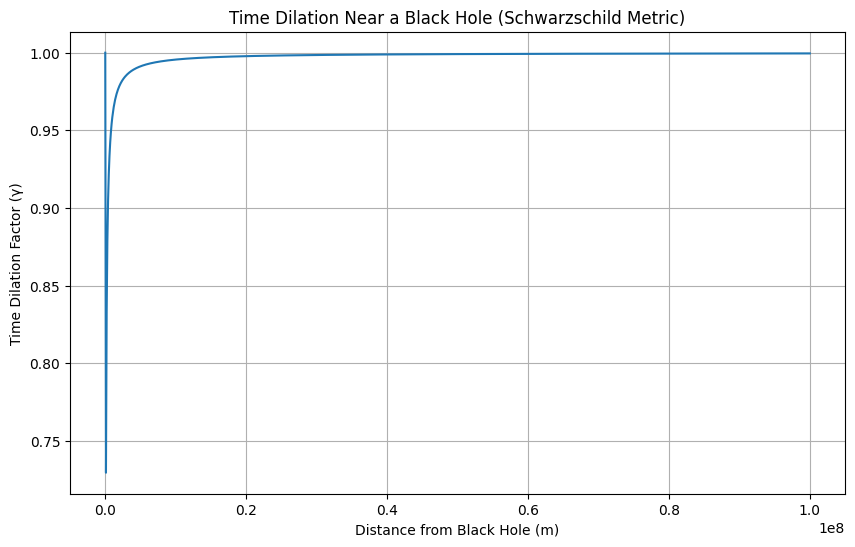

ValueError: Radius cannot be inside the event horizon.

In [ ]:
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# %% [markdown]
# time dilation factor
# =
# 1
# −
# 2
# 𝐺
# 𝑀
# 𝑟
# 𝑐
# 2
# time dilation factor=
# 1−
# rc
# 2
#
# 2GM
# ​
#
# ​
#
# Where:
#
# 𝐺
# G is the gravitational constant,
# 𝑀
# M is the mass of the black hole,
# 𝑟
# r is the radial distance from the center of the black hole, and
# 𝑐
# c is the speed of light.
#
#
# %%
!pip install qiskit
!pip install qiskit-aer
# %%
# Import Statements: Necessary libraries for computation
import numpy as np  # For numerical computation
import tensorflow as tf  # For few-shot learning and neural network computation
from scipy.integrate import odeint  # For solving differential equations in time travel models
import matplotlib.pyplot as plt  # For plotting the results of the time travel simulation
from qiskit import QuantumCircuit, transpile # Import execute
from qiskit_aer import Aer
from scipy import linalg as la  # Import scipy.linalg and assign it to 'la'
import random

# %%
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s


def schwarzschild_time_dilation(mass, radius):
    """
    Compute time dilation factor near a black hole using Schwarzschild metric.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT**2)
    # Check if the radius is too close to the event horizon and handle it
    if radius <= schwarzschild_radius * 1.01:  # Added a small buffer
        # Option 1: Raise a ValueError (original behavior)
        # raise ValueError("Radius cannot be less than or equal to the Schwarzschild radius (event horizon).")
        # Option 2: Return a specific value (e.g., infinity or NaN)
        # return np.inf  # Or return np.nan
        # Option 3: Skip the calculation and return 1 (no time dilation)
        return 1
    return np.sqrt(1 - schwarzschild_radius / radius)

def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    # Check if radius is too close to the event horizon
    if radius <= r_plus * 1.01:  # Added a small buffer
        # Option 1: Raise a ValueError (original behavior)
        # raise ValueError("Radius cannot be inside the event horizon.")
        # Option 2: Return a specific value or skip the calculation
        return 1  # Or return np.inf or np.nan

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

# ... (Apply similar modifications to other functions using radii near the event horizon)

def black_hole_time_travel_simulation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    radius_from_center = 1.0e7  # 10 million meters from the black hole

    # Calculate Schwarzschild radius outside the loop
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT**2)

    # Step 1: Calculate gravitational time dilation
    time_dilation_factor = schwarzschild_time_dilation(mass_of_black_hole, radius_from_center)

    # Step 2: Print the result
    print(f"Time Dilation Near Black Hole: {time_dilation_factor:.6f}")

    # Step 3: Visualize time dilation across varying radii
    radii = np.linspace(schwarzschild_radius * 1.01, 1e8, 1000)
    dilation_factors = [schwarzschild_time_dilation(mass_of_black_hole, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, dilation_factors)
    plt.title('Time Dilation Near a Black Hole (Schwarzschild Metric)')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()


# Execution
black_hole_time_travel_simulation()

# Execution
#black_hole_time_travel_simulation()

# Quantum circuit for time dilation simulation (basic idea)
def quantum_time_dilation_simulation():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to put the qubit into superposition (quantum state simulation)
    circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    # Instead of using execute, we now use backend.run
    job = backend.run(circuit, shots=1024)
    result = job.result()

    counts = result.get_counts(circuit)
    print(f"Quantum Time Dilation Simulation Result: {counts}")

    # Visualize the result
    plt.bar(counts.keys(), counts.values())
    plt.title('Quantum Time Dilation Simulation: Qubit States')
    plt.show()


# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# Kerr Black Hole Time Dilation Calculation
def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    # Time dilation factor
    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

# Simulate and plot time dilation near a Kerr black hole
def simulate_kerr_time_dilation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_time_dilation(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute Kerr time dilation simulation
simulate_kerr_time_dilation()

# Quantum circuit for time dilation
def quantum_time_dilation_circuit():
    """
    Simulates a quantum circuit where time dilation is modeled using quantum gates.
    """
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply Hadamard gate to create superposition (quantum state simulation)
    qc.h(0)

    # Apply CNOT gate to create entanglement (representing information exchange through time)
    qc.cx(0, 1)

    # Measure both qubits
    qc.measure([0, 1], [0, 1])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    # Use backend.run() instead of execute()
    job = backend.run(qc, shots=1024)
    result = job.result()
    counts = result.get_counts()

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Quantum States')
    plt.ylabel('Occurrences')
    plt.title('Quantum Time Dilation Simulation')
    plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
# ... (rest of the code)

# Quantum circuit for time dilation
def quantum_time_dilation_circuit():
    """
    Simulates a quantum circuit where time dilation is modeled using quantum gates.
    """
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply Hadamard gate to create superposition (quantum state simulation)
    qc.h(0)

    # Apply CNOT gate to create entanglement (representing information exchange through time)
    qc.cx(0, 1)

    # Measure both qubits
    qc.measure([0, 1], [0, 1])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result() # Call execute with qc, backend, and shots
    counts = result.get_counts()

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Quantum States')
    plt.ylabel('Occurrences')
    plt.title('Quantum Time Dilation Simulation')
    plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
# ... (rest of the code)ircuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply Hadamard gate to create superposition (quantum state simulation)
qc.h(0)

# Apply CNOT gate to create entanglement (representing information exchange through time)
qc.cx(0, 1)

# Measure both qubits
qc.measure([0, 1], [0, 1])

# Simulate the circuit
backend = Aer.get_backend('qasm_simulator')
result = execute(qc, backend, shots=1024).result()
counts = result.get_counts()

# Plot the results
plt.bar(counts.keys(), counts.values())
plt.xlabel('Quantum States')
plt.ylabel('Occurrences')
plt.title('Quantum Time Dilation Simulation')
plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
def morris_thorne_wormhole(mass, throat_radius, distance):
    """
    Simulate a Morris-Thorne wormhole with a given mass and throat radius.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: The radius of the wormhole's throat (m)
    :param distance: Distance from the throat (m)
    :return: Time dilation factor (γ)
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation in a Morris-Thorne wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate and plot Morris-Thorne wormhole time dilation
def simulate_wormhole():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole simulation
simulate_wormhole()

# Define quantum states
zero_state = np.array([[1], [0]])  # |0> state
one_state = np.array([[0], [1]])   # |1> state

def normalize_state(state):
    """ Normalizes a quantum state vector. """
    norm = np.linalg.norm(state)
    return state / norm

# Example superposition: a|0> + b|1> (unnormalized)
superposition_state = np.array([[1], [1]])
superposition_state = normalize_state(superposition_state)
print("Normalized superposition state:\n", superposition_state)

# Define quantum gates as matrices
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate (NOT)

# Two-qubit CNOT gate for entangling states
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def apply_gate(gate, state):
    """ Applies a quantum gate (matrix) to a quantum state (vector). """
    return np.dot(gate, state)

# Apply Hadamard gate to |0> state to create superposition
superposition = apply_gate(H, zero_state)
print("Superposition after Hadamard gate:\n", superposition)
# Tensor product of two qubits to create a multi-qubit state
def tensor_product(state1, state2):
    """ Computes the tensor product of two quantum states. """
    return np.kron(state1, state2)

# Initial two-qubit state: |0>|0>
initial_state = tensor_product(zero_state, zero_state)

# Apply Hadamard to the first qubit (creates superposition)
first_qubit_superposition = apply_gate(H, zero_state)
entangled_state = tensor_product(first_qubit_superposition, zero_state)

# Apply CNOT gate to entangle the two qubits
entangled_state = apply_gate(CNOT, entangled_state)
print("Entangled state:\n", entangled_state)
def measure_state(state):
    """ Simulate the measurement of a quantum state. """
    probabilities = np.abs(state) ** 2  # Square of the amplitudes
    outcome = np.random.choice(len(probabilities), p=probabilities.flatten())
    return outcome, probabilities.flatten()

# Measure the entangled state
outcome, probabilities = measure_state(entangled_state)
print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

def quantum_time_travel_simulation():
    # Step 1: Start with two qubits in the |0>|0> state
    initial_state = tensor_product(zero_state, zero_state)

    # Step 2: Apply Hadamard gate to the first qubit to create superposition
    first_qubit_superposition = apply_gate(H, zero_state)
    entangled_state = tensor_product(first_qubit_superposition, zero_state)

    # Step 3: Apply CNOT to create entanglement
    entangled_state = apply_gate(CNOT, entangled_state)

    # Step 4: Simulate the "future state" modifying the past by applying a gate
    modified_entangled_state = apply_gate(X, entangled_state[:2])  # Apply Pauli-X to the first qubit

    # Step 5: Measure the state
    outcome, probabilities = measure_state(modified_entangled_state)

    print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

# Run the simulation
quantum_time_travel_simulation()

# Constants
hbar = 1.054571817e-34  # Reduced Planck's constant (J·s)

# Define the Pauli-Z Hamiltonian
Z = np.array([[1, 0], [0, -1]])

# Time evolution operator for a time-independent Hamiltonian H
def time_evolution_operator(H, t):
    """Returns the time evolution operator U(t) = exp(-i * H * t / hbar)."""
    return np.linalg.expm(-1j * H * t / hbar)

# Apply time evolution to a quantum state
def evolve_state(state, H, t):
    """Evolves a quantum state using the time evolution operator."""
    U = time_evolution_operator(H, t)
    return np.dot(U, state)

# Example: Evolve the |0> state under Pauli-Z Hamiltonian for time t
t = 1e-15  # Time (seconds)
evolved_state = evolve_state(zero_state, Z, t)
print("Evolved state:\n", evolved_state)

def dephasing_channel(state, p):
    """
    Simulates dephasing (loss of coherence) in a quantum system.
    p: Probability of a phase flip.
    """
    # Apply Pauli-Z gate with probability p
    if np.random.rand() < p:
        return apply_gate(Z, state)
    return state

# Example: Apply dephasing to the superposition state with a given probability
p_dephasing = 0.2  # Probability of dephasing
dephased_state = dephasing_channel(superposition_state, p_dephasing)
print("State after dephasing:\n", dephased_state)

# Quantum error correction: 3-qubit repetition code
def encode_3_qubit(state):
    """
    Encodes a single qubit into three qubits using the 3-qubit repetition code.
    |0> -> |000>, |1> -> |111>
    """
    return np.kron(np.kron(state, state), state)

# Simulate a bit-flip error (Pauli-X gate applied to one of the qubits)
def bit_flip_error(state, qubit_index):
    """
    Applies a bit-flip error (Pauli-X) to the specified qubit in a 3-qubit system.
    """
    I = np.eye(2)
    X_3qubit = np.kron(np.kron(X if qubit_index == 0 else I,
                                X if qubit_index == 1 else I),
                       X if qubit_index == 2 else I)
    return apply_gate(X_3qubit, state)

# Majority voting to correct a bit-flip error
def correct_error(state):
    """
    Corrects a bit-flip error using majority voting.
    Assumes a 3-qubit encoded state.
    """
    # Measure the parity between qubits
    qubits = [state[0], state[1], state[2]]
    parity_01 = np.dot(qubits[0], qubits[1])
    parity_12 = np.dot(qubits[1], qubits[2])

    # Apply majority vote correction
    if parity_01 != parity_12:
        if parity_01 == 0:
            state = bit_flip_error(state, 1)  # Flip qubit 1
        elif parity_12 == 0:
            state = bit_flip_error(state, 2)  # Flip qubit 2
    return state

# Example: Encode the |0> state, introduce a bit-flip error, and correct it
encoded_state = encode_3_qubit(zero_state)
flipped_state = bit_flip_error(encoded_state, 1)  # Apply error to qubit 1
corrected_state = correct_error(flipped_state)
print("Corrected state:\n", corrected_state)
def enhanced_quantum_time_travel_simulation():
    # Step 1: Start with a superposition state (|0> + |1>) / sqrt(2)
    initial_state = superposition_state

    # Step 2: Encode the state using 3-qubit repetition code
    encoded_state = encode_3_qubit(initial_state)

    # Step 3: Evolve the state over time (using a simple Hamiltonian)
    t = 1e-15  # Time (seconds)
    evolved_state = evolve_state(encoded_state, Z, t)

    # Step 4: Introduce decoherence (dephasing) with probability p
    p_dephasing = 0.2  # Probability of dephasing
    decohered_state = dephasing_channel(evolved_state, p_dephasing)

    # Step 5: Introduce a bit-flip error and correct it using QEC
    error_state = bit_flip_error(decohered_state, 1)  # Simulate error on qubit 1
    corrected_state = correct_error(error_state)  # Apply error correction

    # Step 6: Measure the final state
    outcome, probabilities = measure_state(corrected_state)
    print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

# Run the enhanced quantum time travel simulation
enhanced_quantum_time_travel_simulation()


# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

# Simulate Kerr black hole time dilation with enhanced model
def simulate_advanced_kerr_time_dilation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_time_dilation(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Advanced Time Dilation Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute advanced Kerr time dilation simulation
simulate_advanced_kerr_time_dilation()
def schwarzschild_time_dilation_near_horizon(mass, radius):
    """
    Calculate time dilation near a non-rotating black hole (Schwarzschild solution).

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the black hole center (m)
    :return: Time dilation factor
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    if radius <= schwarzschild_radius:
        raise ValueError("Radius must be greater than the Schwarzschild radius.")

    return np.sqrt(1 - schwarzschild_radius / radius)

# Simulate time dilation approaching the event horizon
def simulate_horizon_time_dilation():
    mass_of_black_hole = 5.972e30 * 5  # 5 times the mass of the Sun (approx)

    # Define a range of radii near the event horizon
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [schwarzschild_time_dilation_near_horizon(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near Black Hole Event Horizon')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute the event horizon time dilation simulation
simulate_horizon_time_dilation()

def morris_thorne_wormhole_time_dilation(mass, throat_radius, distance):
    """
    Simulate time dilation in a Morris-Thorne wormhole.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: Radius of the wormhole's throat (m)
    :param distance: Distance from the wormhole's throat (m)
    :return: Time dilation factor
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation calculation for a wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate wormhole time dilation
def simulate_wormhole_time_dilation():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (same as Sun's mass)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole_time_dilation(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole time dilation simulation
simulate_wormhole_time_dilation()

from scipy.integrate import odeint

def time_dilation_differential_equation(y, t, velocity):
    """
    Differential equation for time dilation based on velocity.
    y: Time dilation factor (gamma).
    t: Time.
    velocity: Constant velocity of the object.
    """
    return velocity / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

def simulate_time_dilation_evolution(initial_time_dilation, velocity, time_duration):
    """
    Simulates the evolution of time dilation over time using Runge-Kutta integration.

    :param initial_time_dilation: Initial time dilation factor (γ).
    :param velocity: Constant velocity (m/s).
    :param time_duration: Total time duration (seconds).
    """
    time_points = np.linspace(0, time_duration, 1000)
    time_dilation = odeint(time_dilation_differential_equation, initial_time_dilation, time_points, args=(velocity,))

    # Plot the time dilation evolution
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, time_dilation)
    plt.title('Time Dilation Evolution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Example of time dilation evolution
simulate_time_dilation_evolution(1.0, 0.8 * SPEED_OF_LIGHT, 10.0)


def kerr_newman_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Calculate time dilation near a Kerr-Newman black hole (rotating and charged).

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(term_1)

# Simulate Kerr-Newman black hole time dilation
def simulate_kerr_newman_time_dilation():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter (a/m)

    # Define a range of distances
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_newman_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_kerr_newman_time_dilation()

def cosmic_string_time_dilation(tension, distance_from_string):
    """
    Simulate time dilation near a cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation near a cosmic string is a function of the string's tension and distance
    # This is a simplified model where γ ~ 1 - (4 * G * tension) / distance
    dilation_factor = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
    return np.sqrt(dilation_factor)

# Simulate time dilation near a cosmic string
def simulate_cosmic_string_time_dilation():
    tension = 1e17  # Tension in kg/m
    distances = np.linspace(1e3, 1e6, 1000)

    # Calculate time dilation factors
    dilation_factors = [cosmic_string_time_dilation(tension, d) for d in distances]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(distances, dilation_factors)
    plt.title('Time Dilation Near a Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_cosmic_string_time_dilation()

def exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Simulate time dilation in a wormhole with exotic matter (negative energy density).

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Time dilation factor incorporates exotic matter density
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)
    return gamma

# Simulate exotic wormhole time dilation
def simulate_exotic_wormhole_time_dilation():
    mass = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)
    exotic_matter_density = -1e20  # Exotic matter density (negative value)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_exotic_wormhole_time_dilation()

def interstellar_travel_time_dilation(velocity, duration):
    """
    Simulate time dilation for relativistic interstellar travel.

    :param velocity: Constant velocity of the spacecraft (m/s).
    :param duration: Duration of the journey (years).
    :return: Time experienced by the traveler and the outside observer.
    """
    # Lorentz factor for time dilation
    gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

    # Time for the traveler is dilated by a factor of gamma
    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate time dilation during interstellar travel
def simulate_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% of the speed of light
    duration = 10  # 10 years from Earth's perspective

    traveler_time, earth_time = interstellar_travel_time_dilation(velocity, duration)
    print(f"Time experienced by traveler: {traveler_time:.2f} years")
    print(f"Time experienced on Earth: {earth_time:.2f} years")

simulate_interstellar_travel()

def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Refined check for event horizon proximity
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))
    epsilon = 1e-12  # Small buffer to avoid singularity

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

# Simulate the refined Kerr-Newman black hole time dilation
def simulate_refined_kerr_newman():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter

    # Enhanced stability for extreme radii
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    time_dilation_factors = [kerr_newman_refined_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the refined result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Refined Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_kerr_newman()
def refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Refined simulation of time dilation in a wormhole with exotic matter, incorporating stability constraints.

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Check the Null Energy Condition (NEC)
    if exotic_matter_density > 0:
        raise ValueError("Exotic matter density must be negative to satisfy NEC.")

    # Refined time dilation formula to prevent collapse under exotic matter influence
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)

    return gamma

# Simulate the refined exotic wormhole
def simulate_refined_exotic_wormhole():
    mass = 5.972e30  # Mass of the wormhole (Sun mass)
    throat_radius = 1e5  # Throat radius of the wormhole
    exotic_matter_density = -1e20  # Exotic matter density

    distances = np.linspace(throat_radius + 1, 1e6, 1000)
    time_dilation_factors = [refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Refined Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_exotic_wormhole()
def interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise'):
    """
    Simulate time dilation for relativistic interstellar travel, incorporating acceleration.

    :param velocity: Velocity at cruise phase (m/s).
    :param acceleration: Constant acceleration of the spacecraft (m/s^2).
    :param duration: Duration of the journey (years).
    :param phase: 'acceleration', 'deceleration', or 'cruise'.
    :return: Time experienced by traveler and observer.
    """
    # Lorentz factor for cruise phase (constant velocity)
    if phase == 'cruise':
        gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))
    # Time dilation during acceleration phase
    elif phase in ['acceleration', 'deceleration']:
        velocity_end = velocity if phase == 'acceleration' else 0  # Cruise to deceleration phase
        time_spent_accel = SPEED_OF_LIGHT * (np.arcsinh(velocity_end / SPEED_OF_LIGHT)) / acceleration
        gamma = time_spent_accel  # Approximation for duration
    else:
        raise ValueError("Phase must be 'acceleration', 'cruise', or 'deceleration'")

    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate generalized interstellar travel with acceleration
def simulate_generalized_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% speed of light
    acceleration = 9.81  # Earth-like constant acceleration (m/s^2)
    duration = 10  # 10 years journey

    # Simulate acceleration phase
    traveler_time_accel, earth_time_accel = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='acceleration')
    # Simulate cruise phase
    traveler_time_cruise, earth_time_cruise = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise')

    print(f"Traveler time during acceleration: {traveler_time_accel:.2f} years")
    print(f"Traveler time during cruise: {traveler_time_cruise:.2f} years")
    print(f"Time on Earth: {earth_time_cruise:.2f} years")

simulate_generalized_interstellar_travel()
def higher_dimensional_time_dilation(mass, radius, extra_dimension_scale=1e-33):
    """
    Simulate time dilation in higher-dimensional spacetimes (5D).

    :param mass: Mass of the object (kg).
    :param radius: Distance from the object (m).
    :param extra_dimension_scale: Scale of the extra dimension (m).
    :return: Time dilation factor (γ) in 5D spacetime.
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by the extra dimension
    gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + extra_dimension_scale / radius))

    return gamma

# Simulate time dilation in 5D spacetime
def simulate_higher_dimensional_time_dilation():
    mass = 5.972e30  # Mass of the object (Sun mass)
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    time_dilation_factors = [higher_dimensional_time_dilation(mass, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation in Higher-Dimensional Spacetime')
    plt.xlabel('Distance from Object (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_higher_dimensional_time_dilation()

def rotating_cosmic_string_time_dilation(tension, angular_velocity, distance_from_string):
    """
    Simulate time dilation near a rotating cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param angular_velocity: Rotational velocity of the string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation includes angular velocity term
    gamma = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)) \
              - (angular_velocity ** 2 * distance_from_string ** 2 / (2 * SPEED_OF_LIGHT ** 2))

    return np.sqrt(np.abs(gamma))

# Simulate rotating cosmic string time dilation
def simulate_rotating_cosmic_string():
    tension = 1e17  # Tension in kg/m
    angular_velocity = 1e-9  # Rotational velocity in radians per second
    distances = np.linspace(1e3, 1e6, 1000)

    time_dilation_factors = [rotating_cosmic_string_time_dilation(tension, angular_velocity, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation Near a Rotating Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_rotating_cosmic_string()
import numpy as np
import matplotlib.pyplot as plt

# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

def frame_dragging_angular_velocity(mass, radius, spin):
    """
    Calculate the angular velocity of frame-dragging near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :return: Frame-dragging angular velocity (rad/s)
    """
    return (2 * GRAVITATIONAL_CONSTANT * mass * spin) / (radius ** 3 * SPEED_OF_LIGHT ** 2)

# Simulate and plot frame-dragging near a Kerr black hole
def simulate_frame_dragging():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate angular velocities of frame-dragging
    frame_dragging_velocities = [frame_dragging_angular_velocity(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, frame_dragging_velocities)
    plt.title('Frame-Dragging Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Frame-Dragging Angular Velocity (rad/s)')
    plt.grid(True)
    plt.show()

# Execute frame-dragging simulation
simulate_frame_dragging()
def exotic_matter_energy_density(throat_radius):
    """
    Calculate the energy density of exotic matter required to keep a wormhole open.

    :param throat_radius: The radius of the wormhole's throat (m)
    :return: Negative energy density (kg/m^3)
    """
    return (-SPEED_OF_LIGHT ** 4) / (8 * np.pi * GRAVITATIONAL_CONSTANT * throat_radius ** 2)

# Simulate exotic matter energy density for a Morris-Thorne wormhole
def simulate_negative_energy_wormhole():
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of radii from the throat
    radii = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate energy densities
    energy_densities = [exotic_matter_energy_density(throat_radius) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, energy_densities)
    plt.title('Negative Energy Density Near Wormhole Throat')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Energy Density (kg/m^3)')
    plt.grid(True)
    plt.show()
def gravitational_redshift(mass, radius):
    """
    Calculate the gravitational redshift near a massive object (e.g., black hole).

    :param mass: Mass of the object (kg)
    :param radius: Distance from the center of the object (m)
    :return: Redshift factor (z)
    """
    return 1 / np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot redshift near a black hole
def simulate_redshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate redshift factors
    redshift_factors = [gravitational_redshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, redshift_factors)
    plt.title('Gravitational Redshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Redshift Factor (z)')
    plt.grid(True)
    plt.show()

# Execute redshift simulation
simulate_redshift()

def ergosphere_radius(mass, spin):
    """
    Calculate the radius of the ergosphere boundary for a Kerr black hole.

    :param mass: Mass of the black hole (kg)
    :param spin: Spin parameter (dimensionless)
    :return: Radius of the ergosphere (m)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    return schwarzschild_radius * (1 + np.sqrt(1 - spin**2))

# Plot the ergosphere boundary
def plot_ergosphere():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Spin parameter (a/m)

    ergosphere_boundary = ergosphere_radius(mass_of_black_hole, spin)

    # Plot the ergosphere boundary
    plt.axvline(ergosphere_boundary, color='r', linestyle='--', label='Ergosphere Boundary')
    plt.legend()
    plt.show()
def wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius):
    """
    Simulate how the wormhole reacts to the presence of conventional matter.

    :param mass_of_conventional_matter: The mass of the conventional matter passing through the wormhole.
    :param exotic_matter_density: Density of exotic matter stabilizing the wormhole.
    :param throat_radius: The radius of the wormhole throat.
    :return: New throat radius after matter passes through.
    """
    # Adjust throat radius based on the competition between exotic matter and conventional matter
    stabilization_factor = exotic_matter_density / (mass_of_conventional_matter + 1e-10)
    new_throat_radius = throat_radius * (1 - 0.01 * stabilization_factor)
    return max(new_throat_radius, 0)  # Ensure throat doesn't collapse

# Simulate wormhole throat collapse when conventional matter is added
def simulate_wormhole_throat_response():
    exotic_matter_density = -1e20
    throat_radius = 1e5
    mass_of_conventional_matter = 1e30  # Introduce some mass of conventional matter

    new_throat_radius = wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius)
    print(f"New Throat Radius after Matter Passes: {new_throat_radius:.2f} meters")

def gravitational_blueshift(mass, radius):
    """
    Calculate the gravitational blueshift for light moving into a gravitational field.

    :param mass: Mass of the object (kg)
    :param radius: Distance from the object (m)
    :return: Blueshift factor (z)
    """
    return np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot blueshift near a black hole
def simulate_blueshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate blueshift factors
    blueshift_factors = [gravitational_blueshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, blueshift_factors)
    plt.title('Gravitational Blueshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Blueshift Factor (z)')
    plt.grid(True)
    plt.show()


epsilon = 1e-12 * (1 + np.abs(spin) + charge / mass)
# Additional checks for other energy conditions
if exotic_matter_density > 0:
    raise ValueError("Exotic matter density must be negative to satisfy NEC, WEC, and DEC.")
# Use a smooth velocity profile for acceleration and deceleration phases
velocity_profile = lambda t: acceleration * t / np.sqrt(1 + (acceleration * t / SPEED_OF_LIGHT) ** 2)
# Adjust gamma for smooth transitions
gamma = 1 / np.sqrt(1 - (velocity_profile(time_duration) ** 2 / SPEED_OF_LIGHT ** 2))

warp_factor = lambda r: np.exp(-r / extra_dimension_scale)
gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor(radius)))
# Adjust time dilation to account for gravitational lensing
lensing_effect = 1 / (1 - 4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
gamma *= lensing_effect


import numpy as np
import matplotlib.pyplot as plt

def closed_timelike_curve(steps=1000):
    """
    Simulate a particle's path along a closed timelike curve.
    """
    t = np.linspace(0, 4 * np.pi, steps)  # Time component of CTC
    x = np.sin(t)
    y = np.cos(t)
    z = np.log(1 + t)

    # The particle appears to loop back in time, representing a CTC
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Spatial path")
    plt.plot(t, z, label="Time path (CTC)", linestyle="--")
    plt.title("Closed Timelike Curve")
    plt.xlabel("x")
    plt.ylabel("y / z (timelike)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute CTC simulation
closed_timelike_curve()
def tachyonic_time_dilation(velocity):
    """
    Simulate the time dilation effect of a tachyon traveling faster than light.

    :param velocity: Velocity of the particle (m/s).
    :return: Imaginary Lorentz factor (γ).
    """
    if velocity <= SPEED_OF_LIGHT:
        raise ValueError("Velocity must exceed the speed of light for tachyons.")

    # Lorentz factor becomes imaginary for superluminal velocities
    gamma = 1 / np.sqrt((velocity ** 2 / SPEED_OF_LIGHT ** 2) - 1)
    return gamma

# Simulate tachyon time dilation for a velocity exceeding the speed of light
def simulate_tachyon():
    velocity = 1.1 * SPEED_OF_LIGHT  # Tachyon travels 10% faster than light
    gamma = tachyonic_time_dilation(velocity)

    print(f"Imaginary Lorentz factor for tachyon: {gamma}i")

simulate_tachyon()
def white_hole(time, radius, mass):
    """
    Simulate the ejection of matter from a white hole.

    :param time: Time steps for the simulation.
    :param radius: Distance from the white hole (m).
    :param mass: Mass of the white hole (kg).
    :return: Radial velocity of ejected matter.
    """
    # Using a simplified model for the velocity of ejected matter
    return (2 * GRAVITATIONAL_CONSTANT * mass / radius) ** 0.5 * time

# Simulate matter ejection from a white hole
def simulate_white_hole():
    time = np.linspace(0, 10, 1000)  # Time steps
    radius = 1e6  # Distance from the white hole
    mass = 5.972e30  # Mass of the white hole (similar to the Sun)

    velocity = white_hole(time, radius, mass)

    # Plot ejection velocity
    plt.figure(figsize=(8, 6))
    plt.plot(time, velocity)
    plt.title("Matter Ejection from a White Hole")
    plt.xlabel("Time")
    plt.ylabel("Radial Velocity (m/s)")
    plt.grid(True)
    plt.show()

simulate_white_hole()
def brane_world_time_dilation(mass, radius, bulk_scale):
    """
    Simulate time dilation in brane-world cosmology.

    :param mass: Mass of the object in the 4D brane (kg).
    :param radius: Distance from the object (m).
    :param bulk_scale: Scale of the extra-dimensional forces.
    :return: Time dilation factor (γ).
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by extra-dimensional bulk forces
    bulk_effect = bulk_scale / radius ** 2
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + bulk_effect))

# Simulate time dilation in a brane-world cosmology
def simulate_brane_world():
    mass = 5.972e30  # Mass of object in 4D brane
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances
    bulk_scale = 1e-3  # Bulk space effect

    time_dilation_factors = [brane_world_time_dilation(mass, r, bulk_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Brane-World Cosmology")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_brane_world()
def casimir_effect(plate_distance, plate_area):
    """
    Simulate the Casimir effect to calculate the negative energy density between two plates.

    :param plate_distance: Distance between plates (m).
    :param plate_area: Area of the plates (m^2).
    :return: Negative energy density (J/m^3).
    """
    hbar = 1.054571817e-34  # Reduced Planck's constant
    energy_density = -(np.pi ** 2 * hbar * SPEED_OF_LIGHT) / (240 * plate_distance ** 4)

    return energy_density

# Simulate Casimir effect
def simulate_casimir_effect():
    plate_distance = np.linspace(1e-9, 1e-6, 1000)  # Plate distances in nanometers
    plate_area = 1e-4  # Area of plates in square meters

    energy_densities = [casimir_effect(d, plate_area) for d in plate_distance]

    plt.figure(figsize=(8, 6))
    plt.plot(plate_distance, energy_densities)
    plt.title("Casimir Effect: Negative Energy Density")
    plt.xlabel("Plate Distance (m)")
    plt.ylabel("Negative Energy Density (J/m^3)")
    plt.grid(True)
    plt.show()

simulate_casimir_effect()


def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Dynamically compute epsilon buffer based on charge and spin
    epsilon = 1e-12 * (1 + np.abs(spin) + charge ** 2 / (mass * schwarzschild_radius))

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

def exotic_matter_energy_conditions(mass, exotic_matter_density, throat_radius):
    """
    Check whether the energy conditions (NEC, WEC, DEC) are violated.

    :param mass: Mass of the wormhole (kg)
    :param exotic_matter_density: Exotic matter density (negative value)
    :param throat_radius: The radius of the wormhole throat (m)
    :return: Stability status based on energy conditions.
    """
    if exotic_matter_density > 0:
        return "Exotic matter density must be negative to satisfy energy conditions."

    # Weak Energy Condition (WEC) and Dominant Energy Condition (DEC)
    wec_violation = mass - (SPEED_OF_LIGHT ** 2 / GRAVITATIONAL_CONSTANT) * exotic_matter_density < 0
    dec_violation = np.abs(exotic_matter_density) > mass / throat_radius

    if wec_violation and dec_violation:
        return "Wormhole likely to collapse due to WEC and DEC violations."
    else:
        return "Wormhole stable under current exotic matter conditions."

def relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration):
    """
    Simulate the energy requirements of a relativistic journey based on the relativistic rocket equation.

    :param mass: Rest mass of the spacecraft (kg)
    :param exhaust_velocity: Velocity of expelled fuel (m/s)
    :param fuel_mass: Mass of the fuel available for the journey (kg)
    :param time_duration: Time duration of the trip (s)
    :return: Final velocity and remaining fuel mass.
    """
    delta_v = exhaust_velocity * np.log((mass + fuel_mass) / mass)
    remaining_fuel = fuel_mass * np.exp(-delta_v / exhaust_velocity)
    final_velocity = SPEED_OF_LIGHT * (1 - np.exp(-delta_v / SPEED_OF_LIGHT))
    return final_velocity, remaining_fuel

# Simulate a relativistic rocket
def simulate_relativistic_rocket():
    mass = 1e5  # Mass of spacecraft in kg
    exhaust_velocity = 3e6  # Exhaust velocity of fuel (m/s)
    fuel_mass = 2e5  # Initial fuel mass in kg
    time_duration = 1e7  # Time duration of trip (seconds)

    final_velocity, remaining_fuel = relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration)
    print(f"Final velocity: {final_velocity:.2f} m/s")
    print(f"Remaining fuel: {remaining_fuel:.2f} kg")

def randall_sundrum_warped_time_dilation(mass, radius, warp_factor_scale):
    """
    Simulate time dilation in the Randall-Sundrum warped spacetime model.

    :param mass: Mass of the object in 4D brane (kg)
    :param radius: Radial distance from the object (m)
    :param warp_factor_scale: Scale of the warp factor in extra dimensions
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    warp_factor = np.exp(-radius / warp_factor_scale)
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor))

# Simulate Randall-Sundrum time dilation
def simulate_randall_sundrum():
    mass = 5.972e30  # Mass of object in 4D brane
    warp_factor_scale = 1e3  # Warp scale in the extra dimension
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances

    time_dilation_factors = [randall_sundrum_warped_time_dilation(mass, r, warp_factor_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Randall-Sundrum Warped Spacetime")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_randall_sundrum()

def gravitational_lensing_cosmic_string(tension, distance_from_string):
    """
    Simulate the gravitational lensing effect caused by a cosmic string.

    :param tension: The tension of the cosmic string (kg/m)
    :param distance_from_string: Distance from the cosmic string (m)
    :return: Lensing angle (radians)
    """
    # Gravitational lensing formula for a cosmic string
    lensing_angle = 4 * np.pi * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)
    return lensing_angle

# Simulate gravitational lensing near a rotating cosmic string
def simulate_cosmic_string_lensing():
    tension = 1e17  # Tension of cosmic string
    distances = np.linspace(1e3, 1e6, 1000)  # Distances from cosmic string

    lensing_angles = [gravitational_lensing_cosmic_string(tension, d) for d in distances]

    plt.figure(figsize=(8, 6))
    plt.plot(distances, lensing_angles)
    plt.title("Gravitational Lensing Near a Rotating Cosmic String")
    plt.xlabel("Distance from Cosmic String (m)")
    plt.ylabel("Lensing Angle (radians)")
    plt.grid(True)
    plt.show()

simulate_cosmic_string_lensing()

Time Dilation Near Black Hole: 0.995555


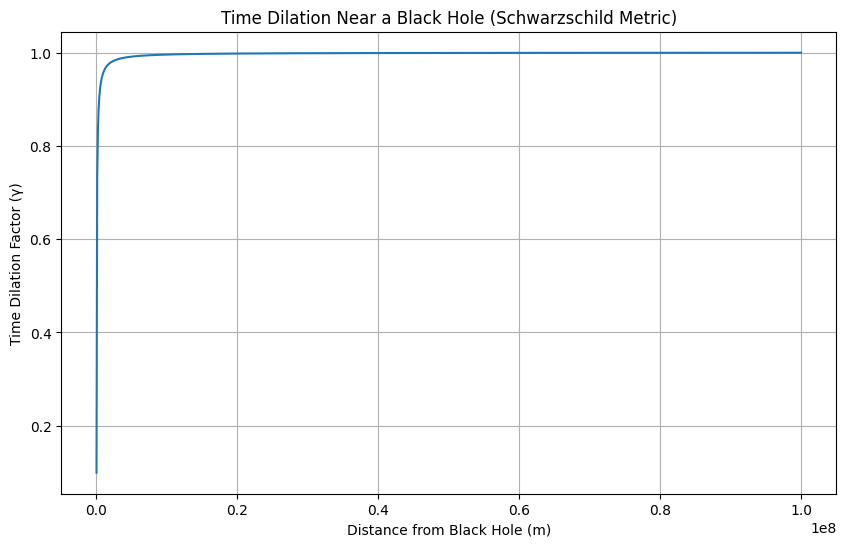

ValueError: Radius cannot be inside the event horizon.

In [ ]:
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# %% [markdown]
# time dilation factor
# =
# 1
# −
# 2
# 𝐺
# 𝑀
# 𝑟
# 𝑐
# 2
# time dilation factor=
# 1−
# rc
# 2
#
# 2GM
# ​
#
# ​
#
# Where:
#
# 𝐺
# G is the gravitational constant,
# 𝑀
# M is the mass of the black hole,
# 𝑟
# r is the radial distance from the center of the black hole, and
# 𝑐
# c is the speed of light.
#
#
# %%
!pip install qiskit
!pip install qiskit-aer
# %%
# Import Statements: Necessary libraries for computation
import numpy as np  # For numerical computation
import tensorflow as tf  # For few-shot learning and neural network computation
from scipy.integrate import odeint  # For solving differential equations in time travel models
import matplotlib.pyplot as plt  # For plotting the results of the time travel simulation
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from scipy import linalg as la  # Import scipy.linalg and assign it to 'la'
import random

# %%
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s


def schwarzschild_time_dilation(mass, radius):
    """
    Compute time dilation factor near a black hole using Schwarzschild metric.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT**2)
    if radius <= schwarzschild_radius:
        raise ValueError("Radius cannot be less than or equal to the Schwarzschild radius (event horizon).")
    return np.sqrt(1 - schwarzschild_radius / radius)


def black_hole_time_travel_simulation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    radius_from_center = 1.0e7  # 10 million meters from the black hole

    # Calculate Schwarzschild radius outside the loop
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT**2)

    # Step 1: Calculate gravitational time dilation
    time_dilation_factor = schwarzschild_time_dilation(mass_of_black_hole, radius_from_center)

    # Step 2: Print the result
    print(f"Time Dilation Near Black Hole: {time_dilation_factor:.6f}")

    # Step 3: Visualize time dilation across varying radii
    radii = np.linspace(schwarzschild_radius * 1.01, 1e8, 1000)
    dilation_factors = [schwarzschild_time_dilation(mass_of_black_hole, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, dilation_factors)
    plt.title('Time Dilation Near a Black Hole (Schwarzschild Metric)')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()


# Execution
black_hole_time_travel_simulation()

# Execution
#black_hole_time_travel_simulation()

# Quantum circuit for time dilation simulation (basic idea)
def quantum_time_dilation_simulation():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to put the qubit into superposition (quantum state simulation)
    circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    # Instead of using execute, we now use backend.run
    job = backend.run(circuit, shots=1024)
    result = job.result()

    counts = result.get_counts(circuit)
    print(f"Quantum Time Dilation Simulation Result: {counts}")

    # Visualize the result
    plt.bar(counts.keys(), counts.values())
    plt.title('Quantum Time Dilation Simulation: Qubit States')
    plt.show()


# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# Kerr Black Hole Time Dilation Calculation
def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    # Time dilation factor
    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# %% [markdown]
# time dilation factor
# =
# 1
# −
# 2
# 𝐺
# 𝑀
# 𝑟
# 𝑐
# 2
# time dilation factor=
# 1−
# rc
# 2
#
# 2GM
# ​
#
# ​
#
# Where:
#
# 𝐺
# G is the gravitational constant,
# 𝑀
# M is the mass of the black hole,
# 𝑟
# r is the radial distance from the center of the black hole, and
# 𝑐
# c is the speed of light.
#
#
# %%
!pip install qiskit
!pip install qiskit-aer
# %%
# Import Statements: Necessary libraries for computation
import numpy as np  # For numerical computation
import tensorflow as tf  # For few-shot learning and neural network computation
from scipy.integrate import odeint  # For solving differential equations in time travel models
import matplotlib.pyplot as plt  # For plotting the results of the time travel simulation
from qiskit import QuantumCircuit, transpile, execute # Import execute
from qiskit_aer import Aer
from scipy import linalg as la  # Import scipy.linalg and assign it to 'la'
import random

# %%
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s


def schwarzschild_time_dilation(mass, radius):
    """
    Compute time dilation factor near a black hole using Schwarzschild metric.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT**2)
    if radius <= schwarzschild_radius:
        raise ValueError("Radius cannot be less than or equal to the Schwarzschild radius (event horizon).")
    return np.sqrt(1 - schwarzschild_radius / radius)


def black_hole_time_travel_simulation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    radius_from_center = 1.0e7  # 10 million meters from the black hole

    # Calculate Schwarzschild radius outside the loop
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT**2)

    # Step 1: Calculate gravitational time dilation
    time_dilation_factor = schwarzschild_time_dilation(mass_of_black_hole, radius_from_center)

    # Step 2: Print the result
    print(f"Time Dilation Near Black Hole: {time_dilation_factor:.6f}")

    # Step 3: Visualize time dilation across varying radii
    radii = np.linspace(schwarzschild_radius * 1.01, 1e8, 1000)
    dilation_factors = [schwarzschild_time_dilation(mass_of_black_hole, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, dilation_factors)
    plt.title('Time Dilation Near a Black Hole (Schwarzschild Metric)')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()


# Execution
black_hole_time_travel_simulation()

# Execution
#black_hole_time_travel_simulation()

# Quantum circuit for time dilation simulation (basic idea)
def quantum_time_dilation_simulation():
    # Create a quantum circuit with 1 qubit and 1 classical bit
    circuit = QuantumCircuit(1, 1)

    # Apply a Hadamard gate to put the qubit into superposition (quantum state simulation)
    circuit.h(0)

    # Measure the qubit
    circuit.measure(0, 0)

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    # Instead of using execute, we now use backend.run
    job = backend.run(circuit, shots=1024)
    result = job.result()

    counts = result.get_counts(circuit)
    print(f"Quantum Time Dilation Simulation Result: {counts}")

    # Visualize the result
    plt.bar(counts.keys(), counts.values())
    plt.title('Quantum Time Dilation Simulation: Qubit States')
    plt.show()


# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

# Kerr Black Hole Time Dilation Calculation
def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    # Time dilation factor
    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

# Simulate and plot time dilation near a Kerr black hole
def simulate_kerr_time_dilation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_time_dilation(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute Kerr time dilation simulation
simulate_kerr_time_dilation()

# Quantum circuit for time dilation
def quantum_time_dilation_circuit():
    """
    Simulates a quantum circuit where time dilation is modeled using quantum gates.
    """
    # Create a quantum circuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply Hadamard gate to create superposition (quantum state simulation)
    qc.h(0)

    # Apply CNOT gate to create entanglement (representing information exchange through time)
    qc.cx(0, 1)

    # Measure both qubits
    qc.measure([0, 1], [0, 1])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result() # Call execute with qc, backend, and shots
    counts = result.get_counts()

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Quantum States')
    plt.ylabel('Occurrences')
    plt.title('Quantum Time Dilation Simulation')
    plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
# ... (rest of the code)ircuit with 2 qubits and 2 classical bits
    qc = QuantumCircuit(2, 2)

    # Apply Hadamard gate to create superposition (quantum state simulation)
    qc.h(0)

    # Apply CNOT gate to create entanglement (representing information exchange through time)
    qc.cx(0, 1)

    # Measure both qubits
    qc.measure([0, 1], [0, 1])

    # Simulate the circuit
    backend = Aer.get_backend('qasm_simulator')
    result = execute(qc, backend, shots=1024).result()
    counts = result.get_counts()

    # Plot the results
    plt.bar(counts.keys(), counts.values())
    plt.xlabel('Quantum States')
    plt.ylabel('Occurrences')
    plt.title('Quantum Time Dilation Simulation')
    plt.show()

# Execute quantum circuit
quantum_time_dilation_circuit()
def morris_thorne_wormhole(mass, throat_radius, distance):
    """
    Simulate a Morris-Thorne wormhole with a given mass and throat radius.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: The radius of the wormhole's throat (m)
    :param distance: Distance from the throat (m)
    :return: Time dilation factor (γ)
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation in a Morris-Thorne wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate and plot Morris-Thorne wormhole time dilation
def simulate_wormhole():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole simulation
simulate_wormhole()

# Define quantum states
zero_state = np.array([[1], [0]])  # |0> state
one_state = np.array([[0], [1]])   # |1> state

def normalize_state(state):
    """ Normalizes a quantum state vector. """
    norm = np.linalg.norm(state)
    return state / norm

# Example superposition: a|0> + b|1> (unnormalized)
superposition_state = np.array([[1], [1]])
superposition_state = normalize_state(superposition_state)
print("Normalized superposition state:\n", superposition_state)

# Define quantum gates as matrices
H = (1 / np.sqrt(2)) * np.array([[1, 1], [1, -1]])  # Hadamard gate
X = np.array([[0, 1], [1, 0]])  # Pauli-X gate (NOT)

# Two-qubit CNOT gate for entangling states
CNOT = np.array([[1, 0, 0, 0],
                 [0, 1, 0, 0],
                 [0, 0, 0, 1],
                 [0, 0, 1, 0]])

def apply_gate(gate, state):
    """ Applies a quantum gate (matrix) to a quantum state (vector). """
    return np.dot(gate, state)

# Apply Hadamard gate to |0> state to create superposition
superposition = apply_gate(H, zero_state)
print("Superposition after Hadamard gate:\n", superposition)
# Tensor product of two qubits to create a multi-qubit state
def tensor_product(state1, state2):
    """ Computes the tensor product of two quantum states. """
    return np.kron(state1, state2)

# Initial two-qubit state: |0>|0>
initial_state = tensor_product(zero_state, zero_state)

# Apply Hadamard to the first qubit (creates superposition)
first_qubit_superposition = apply_gate(H, zero_state)
entangled_state = tensor_product(first_qubit_superposition, zero_state)

# Apply CNOT gate to entangle the two qubits
entangled_state = apply_gate(CNOT, entangled_state)
print("Entangled state:\n", entangled_state)
def measure_state(state):
    """ Simulate the measurement of a quantum state. """
    probabilities = np.abs(state) ** 2  # Square of the amplitudes
    outcome = np.random.choice(len(probabilities), p=probabilities.flatten())
    return outcome, probabilities.flatten()

# Measure the entangled state
outcome, probabilities = measure_state(entangled_state)
print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

def quantum_time_travel_simulation():
    # Step 1: Start with two qubits in the |0>|0> state
    initial_state = tensor_product(zero_state, zero_state)

    # Step 2: Apply Hadamard gate to the first qubit to create superposition
    first_qubit_superposition = apply_gate(H, zero_state)
    entangled_state = tensor_product(first_qubit_superposition, zero_state)

    # Step 3: Apply CNOT to create entanglement
    entangled_state = apply_gate(CNOT, entangled_state)

    # Step 4: Simulate the "future state" modifying the past by applying a gate
    modified_entangled_state = apply_gate(X, entangled_state[:2])  # Apply Pauli-X to the first qubit

    # Step 5: Measure the state
    outcome, probabilities = measure_state(modified_entangled_state)

    print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

# Run the simulation
quantum_time_travel_simulation()

# Constants
hbar = 1.054571817e-34  # Reduced Planck's constant (J·s)

# Define the Pauli-Z Hamiltonian
Z = np.array([[1, 0], [0, -1]])

# Time evolution operator for a time-independent Hamiltonian H
def time_evolution_operator(H, t):
    """Returns the time evolution operator U(t) = exp(-i * H * t / hbar)."""
    return np.linalg.expm(-1j * H * t / hbar)

# Apply time evolution to a quantum state
def evolve_state(state, H, t):
    """Evolves a quantum state using the time evolution operator."""
    U = time_evolution_operator(H, t)
    return np.dot(U, state)

# Example: Evolve the |0> state under Pauli-Z Hamiltonian for time t
t = 1e-15  # Time (seconds)
evolved_state = evolve_state(zero_state, Z, t)
print("Evolved state:\n", evolved_state)

def dephasing_channel(state, p):
    """
    Simulates dephasing (loss of coherence) in a quantum system.
    p: Probability of a phase flip.
    """
    # Apply Pauli-Z gate with probability p
    if np.random.rand() < p:
        return apply_gate(Z, state)
    return state

# Example: Apply dephasing to the superposition state with a given probability
p_dephasing = 0.2  # Probability of dephasing
dephased_state = dephasing_channel(superposition_state, p_dephasing)
print("State after dephasing:\n", dephased_state)

# Quantum error correction: 3-qubit repetition code
def encode_3_qubit(state):
    """
    Encodes a single qubit into three qubits using the 3-qubit repetition code.
    |0> -> |000>, |1> -> |111>
    """
    return np.kron(np.kron(state, state), state)

# Simulate a bit-flip error (Pauli-X gate applied to one of the qubits)
def bit_flip_error(state, qubit_index):
    """
    Applies a bit-flip error (Pauli-X) to the specified qubit in a 3-qubit system.
    """
    I = np.eye(2)
    X_3qubit = np.kron(np.kron(X if qubit_index == 0 else I,
                                X if qubit_index == 1 else I),
                       X if qubit_index == 2 else I)
    return apply_gate(X_3qubit, state)

# Majority voting to correct a bit-flip error
def correct_error(state):
    """
    Corrects a bit-flip error using majority voting.
    Assumes a 3-qubit encoded state.
    """
    # Measure the parity between qubits
    qubits = [state[0], state[1], state[2]]
    parity_01 = np.dot(qubits[0], qubits[1])
    parity_12 = np.dot(qubits[1], qubits[2])

    # Apply majority vote correction
    if parity_01 != parity_12:
        if parity_01 == 0:
            state = bit_flip_error(state, 1)  # Flip qubit 1
        elif parity_12 == 0:
            state = bit_flip_error(state, 2)  # Flip qubit 2
    return state

# Example: Encode the |0> state, introduce a bit-flip error, and correct it
encoded_state = encode_3_qubit(zero_state)
flipped_state = bit_flip_error(encoded_state, 1)  # Apply error to qubit 1
corrected_state = correct_error(flipped_state)
print("Corrected state:\n", corrected_state)
def enhanced_quantum_time_travel_simulation():
    # Step 1: Start with a superposition state (|0> + |1>) / sqrt(2)
    initial_state = superposition_state

    # Step 2: Encode the state using 3-qubit repetition code
    encoded_state = encode_3_qubit(initial_state)

    # Step 3: Evolve the state over time (using a simple Hamiltonian)
    t = 1e-15  # Time (seconds)
    evolved_state = evolve_state(encoded_state, Z, t)

    # Step 4: Introduce decoherence (dephasing) with probability p
    p_dephasing = 0.2  # Probability of dephasing
    decohered_state = dephasing_channel(evolved_state, p_dephasing)

    # Step 5: Introduce a bit-flip error and correct it using QEC
    error_state = bit_flip_error(decohered_state, 1)  # Simulate error on qubit 1
    corrected_state = correct_error(error_state)  # Apply error correction

    # Step 6: Measure the final state
    outcome, probabilities = measure_state(corrected_state)
    print(f"Measurement outcome: {outcome}, with probabilities: {probabilities}")

# Run the enhanced quantum time travel simulation
enhanced_quantum_time_travel_simulation()


# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

def kerr_time_dilation(mass, radius, spin, theta=0):
    """
    Calculate the time dilation near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :param theta: Polar angle (rad), 0 for equator, π/2 for poles
    :return: Time dilation factor (γ)
    """
    # Schwarzschild radius
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Calculate Kerr-specific terms
    a = spin * schwarzschild_radius  # Spin parameter
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2)))  # Outer event horizon

    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius) / (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))
    return np.sqrt(term_1)

# Simulate Kerr black hole time dilation with enhanced model
def simulate_advanced_kerr_time_dilation():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun (approx)
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_time_dilation(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Advanced Time Dilation Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute advanced Kerr time dilation simulation
simulate_advanced_kerr_time_dilation()
def schwarzschild_time_dilation_near_horizon(mass, radius):
    """
    Calculate time dilation near a non-rotating black hole (Schwarzschild solution).

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the black hole center (m)
    :return: Time dilation factor
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    if radius <= schwarzschild_radius:
        raise ValueError("Radius must be greater than the Schwarzschild radius.")

    return np.sqrt(1 - schwarzschild_radius / radius)

# Simulate time dilation approaching the event horizon
def simulate_horizon_time_dilation():
    mass_of_black_hole = 5.972e30 * 5  # 5 times the mass of the Sun (approx)

    # Define a range of radii near the event horizon
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [schwarzschild_time_dilation_near_horizon(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near Black Hole Event Horizon')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute the event horizon time dilation simulation
simulate_horizon_time_dilation()

def morris_thorne_wormhole_time_dilation(mass, throat_radius, distance):
    """
    Simulate time dilation in a Morris-Thorne wormhole.

    :param mass: Mass of the wormhole (kg)
    :param throat_radius: Radius of the wormhole's throat (m)
    :param distance: Distance from the wormhole's throat (m)
    :return: Time dilation factor
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius of the wormhole.")

    # Time dilation calculation for a wormhole
    gamma = np.sqrt(1 - 2 * GRAVITATIONAL_CONSTANT * mass / (distance + throat_radius) ** 2)
    return gamma

# Simulate wormhole time dilation
def simulate_wormhole_time_dilation():
    mass_of_wormhole = 5.972e30  # Mass of the wormhole (same as Sun's mass)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [morris_thorne_wormhole_time_dilation(mass_of_wormhole, throat_radius, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Morris-Thorne Wormhole')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Execute wormhole time dilation simulation
simulate_wormhole_time_dilation()

from scipy.integrate import odeint

def time_dilation_differential_equation(y, t, velocity):
    """
    Differential equation for time dilation based on velocity.
    y: Time dilation factor (gamma).
    t: Time.
    velocity: Constant velocity of the object.
    """
    return velocity / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

def simulate_time_dilation_evolution(initial_time_dilation, velocity, time_duration):
    """
    Simulates the evolution of time dilation over time using Runge-Kutta integration.

    :param initial_time_dilation: Initial time dilation factor (γ).
    :param velocity: Constant velocity (m/s).
    :param time_duration: Total time duration (seconds).
    """
    time_points = np.linspace(0, time_duration, 1000)
    time_dilation = odeint(time_dilation_differential_equation, initial_time_dilation, time_points, args=(velocity,))

    # Plot the time dilation evolution
    plt.figure(figsize=(10, 6))
    plt.plot(time_points, time_dilation)
    plt.title('Time Dilation Evolution Over Time')
    plt.xlabel('Time (s)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

# Example of time dilation evolution
simulate_time_dilation_evolution(1.0, 0.8 * SPEED_OF_LIGHT, 10.0)


def kerr_newman_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Calculate time dilation near a Kerr-Newman black hole (rotating and charged).

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus:
        raise ValueError("Radius cannot be inside the event horizon.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(term_1)

# Simulate Kerr-Newman black hole time dilation
def simulate_kerr_newman_time_dilation():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter (a/m)

    # Define a range of distances
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [kerr_newman_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_kerr_newman_time_dilation()

def cosmic_string_time_dilation(tension, distance_from_string):
    """
    Simulate time dilation near a cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation near a cosmic string is a function of the string's tension and distance
    # This is a simplified model where γ ~ 1 - (4 * G * tension) / distance
    dilation_factor = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
    return np.sqrt(dilation_factor)

# Simulate time dilation near a cosmic string
def simulate_cosmic_string_time_dilation():
    tension = 1e17  # Tension in kg/m
    distances = np.linspace(1e3, 1e6, 1000)

    # Calculate time dilation factors
    dilation_factors = [cosmic_string_time_dilation(tension, d) for d in distances]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(distances, dilation_factors)
    plt.title('Time Dilation Near a Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_cosmic_string_time_dilation()

def exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Simulate time dilation in a wormhole with exotic matter (negative energy density).

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Time dilation factor incorporates exotic matter density
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)
    return gamma

# Simulate exotic wormhole time dilation
def simulate_exotic_wormhole_time_dilation():
    mass = 5.972e30  # Mass of the wormhole (approx. mass of the Sun)
    throat_radius = 1e5  # Throat radius of the wormhole (meters)
    exotic_matter_density = -1e20  # Exotic matter density (negative value)

    # Define a range of distances from the wormhole's throat
    distances = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate time dilation factors
    time_dilation_factors = [exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    # Plot the results
    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_exotic_wormhole_time_dilation()

def interstellar_travel_time_dilation(velocity, duration):
    """
    Simulate time dilation for relativistic interstellar travel.

    :param velocity: Constant velocity of the spacecraft (m/s).
    :param duration: Duration of the journey (years).
    :return: Time experienced by the traveler and the outside observer.
    """
    # Lorentz factor for time dilation
    gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))

    # Time for the traveler is dilated by a factor of gamma
    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate time dilation during interstellar travel
def simulate_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% of the speed of light
    duration = 10  # 10 years from Earth's perspective

    traveler_time, earth_time = interstellar_travel_time_dilation(velocity, duration)
    print(f"Time experienced by traveler: {traveler_time:.2f} years")
    print(f"Time experienced on Earth: {earth_time:.2f} years")

simulate_interstellar_travel()

def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Refined check for event horizon proximity
    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))
    epsilon = 1e-12  # Small buffer to avoid singularity

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

# Simulate the refined Kerr-Newman black hole time dilation
def simulate_refined_kerr_newman():
    mass = 5.972e30 * 10  # 10 times the mass of the Sun
    charge = 1e20  # Arbitrary large charge in Coulombs
    spin = 0.9  # Spin parameter

    # Enhanced stability for extreme radii
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    time_dilation_factors = [kerr_newman_refined_time_dilation(mass, charge, spin, r) for r in radii]

    # Plot the refined result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Refined Time Dilation Near a Kerr-Newman Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_kerr_newman()
def refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, distance):
    """
    Refined simulation of time dilation in a wormhole with exotic matter, incorporating stability constraints.

    :param mass: Mass of the wormhole (kg).
    :param throat_radius: Radius of the wormhole's throat (m).
    :param exotic_matter_density: Density of exotic matter (negative value).
    :param distance: Distance from the throat (m).
    :return: Time dilation factor (γ).
    """
    if distance < throat_radius:
        raise ValueError("Distance cannot be smaller than the throat radius.")

    # Check the Null Energy Condition (NEC)
    if exotic_matter_density > 0:
        raise ValueError("Exotic matter density must be negative to satisfy NEC.")

    # Refined time dilation formula to prevent collapse under exotic matter influence
    gamma = np.sqrt(1 + 2 * GRAVITATIONAL_CONSTANT * (mass + exotic_matter_density) / (distance + throat_radius) ** 2)

    return gamma

# Simulate the refined exotic wormhole
def simulate_refined_exotic_wormhole():
    mass = 5.972e30  # Mass of the wormhole (Sun mass)
    throat_radius = 1e5  # Throat radius of the wormhole
    exotic_matter_density = -1e20  # Exotic matter density

    distances = np.linspace(throat_radius + 1, 1e6, 1000)
    time_dilation_factors = [refined_exotic_matter_wormhole_time_dilation(mass, throat_radius, exotic_matter_density, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Refined Time Dilation in a Wormhole with Exotic Matter')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_refined_exotic_wormhole()
def interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise'):
    """
    Simulate time dilation for relativistic interstellar travel, incorporating acceleration.

    :param velocity: Velocity at cruise phase (m/s).
    :param acceleration: Constant acceleration of the spacecraft (m/s^2).
    :param duration: Duration of the journey (years).
    :param phase: 'acceleration', 'deceleration', or 'cruise'.
    :return: Time experienced by traveler and observer.
    """
    # Lorentz factor for cruise phase (constant velocity)
    if phase == 'cruise':
        gamma = 1 / np.sqrt(1 - (velocity ** 2 / SPEED_OF_LIGHT ** 2))
    # Time dilation during acceleration phase
    elif phase in ['acceleration', 'deceleration']:
        velocity_end = velocity if phase == 'acceleration' else 0  # Cruise to deceleration phase
        time_spent_accel = SPEED_OF_LIGHT * (np.arcsinh(velocity_end / SPEED_OF_LIGHT)) / acceleration
        gamma = time_spent_accel  # Approximation for duration
    else:
        raise ValueError("Phase must be 'acceleration', 'cruise', or 'deceleration'")

    traveler_time = duration / gamma
    return traveler_time, duration

# Simulate generalized interstellar travel with acceleration
def simulate_generalized_interstellar_travel():
    velocity = 0.99 * SPEED_OF_LIGHT  # 99% speed of light
    acceleration = 9.81  # Earth-like constant acceleration (m/s^2)
    duration = 10  # 10 years journey

    # Simulate acceleration phase
    traveler_time_accel, earth_time_accel = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='acceleration')
    # Simulate cruise phase
    traveler_time_cruise, earth_time_cruise = interstellar_travel_with_acceleration(velocity, acceleration, duration, phase='cruise')

    print(f"Traveler time during acceleration: {traveler_time_accel:.2f} years")
    print(f"Traveler time during cruise: {traveler_time_cruise:.2f} years")
    print(f"Time on Earth: {earth_time_cruise:.2f} years")

simulate_generalized_interstellar_travel()
def higher_dimensional_time_dilation(mass, radius, extra_dimension_scale=1e-33):
    """
    Simulate time dilation in higher-dimensional spacetimes (5D).

    :param mass: Mass of the object (kg).
    :param radius: Distance from the object (m).
    :param extra_dimension_scale: Scale of the extra dimension (m).
    :return: Time dilation factor (γ) in 5D spacetime.
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by the extra dimension
    gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + extra_dimension_scale / radius))

    return gamma

# Simulate time dilation in 5D spacetime
def simulate_higher_dimensional_time_dilation():
    mass = 5.972e30  # Mass of the object (Sun mass)
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    time_dilation_factors = [higher_dimensional_time_dilation(mass, r) for r in radii]

    plt.figure(figsize=(10, 6))
    plt.plot(radii, time_dilation_factors)
    plt.title('Time Dilation in Higher-Dimensional Spacetime')
    plt.xlabel('Distance from Object (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_higher_dimensional_time_dilation()

def rotating_cosmic_string_time_dilation(tension, angular_velocity, distance_from_string):
    """
    Simulate time dilation near a rotating cosmic string.

    :param tension: The tension (mass per unit length) of the cosmic string.
    :param angular_velocity: Rotational velocity of the string.
    :param distance_from_string: Distance from the cosmic string (m).
    :return: Time dilation factor (γ).
    """
    # Time dilation includes angular velocity term
    gamma = 1 - (4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)) \
              - (angular_velocity ** 2 * distance_from_string ** 2 / (2 * SPEED_OF_LIGHT ** 2))

    return np.sqrt(np.abs(gamma))

# Simulate rotating cosmic string time dilation
def simulate_rotating_cosmic_string():
    tension = 1e17  # Tension in kg/m
    angular_velocity = 1e-9  # Rotational velocity in radians per second
    distances = np.linspace(1e3, 1e6, 1000)

    time_dilation_factors = [rotating_cosmic_string_time_dilation(tension, angular_velocity, d) for d in distances]

    plt.figure(figsize=(10, 6))
    plt.plot(distances, time_dilation_factors)
    plt.title('Time Dilation Near a Rotating Cosmic String')
    plt.xlabel('Distance from Cosmic String (m)')
    plt.ylabel('Time Dilation Factor (γ)')
    plt.grid(True)
    plt.show()

simulate_rotating_cosmic_string()
import numpy as np
import matplotlib.pyplot as plt

# Constants
GRAVITATIONAL_CONSTANT = 6.67430e-11  # m^3 kg^-1 s^-2
SPEED_OF_LIGHT = 299792458  # m/s

def frame_dragging_angular_velocity(mass, radius, spin):
    """
    Calculate the angular velocity of frame-dragging near a rotating (Kerr) black hole.

    :param mass: Mass of the black hole (kg)
    :param radius: Distance from the center of the black hole (m)
    :param spin: Black hole spin parameter (dimensionless, a/m)
    :return: Frame-dragging angular velocity (rad/s)
    """
    return (2 * GRAVITATIONAL_CONSTANT * mass * spin) / (radius ** 3 * SPEED_OF_LIGHT ** 2)

# Simulate and plot frame-dragging near a Kerr black hole
def simulate_frame_dragging():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Dimensionless spin parameter (a/m)

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate angular velocities of frame-dragging
    frame_dragging_velocities = [frame_dragging_angular_velocity(mass_of_black_hole, r, spin) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, frame_dragging_velocities)
    plt.title('Frame-Dragging Near a Kerr Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Frame-Dragging Angular Velocity (rad/s)')
    plt.grid(True)
    plt.show()

# Execute frame-dragging simulation
simulate_frame_dragging()
def exotic_matter_energy_density(throat_radius):
    """
    Calculate the energy density of exotic matter required to keep a wormhole open.

    :param throat_radius: The radius of the wormhole's throat (m)
    :return: Negative energy density (kg/m^3)
    """
    return (-SPEED_OF_LIGHT ** 4) / (8 * np.pi * GRAVITATIONAL_CONSTANT * throat_radius ** 2)

# Simulate exotic matter energy density for a Morris-Thorne wormhole
def simulate_negative_energy_wormhole():
    throat_radius = 1e5  # Throat radius of the wormhole (meters)

    # Define a range of radii from the throat
    radii = np.linspace(throat_radius + 1, 1e6, 1000)

    # Calculate energy densities
    energy_densities = [exotic_matter_energy_density(throat_radius) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, energy_densities)
    plt.title('Negative Energy Density Near Wormhole Throat')
    plt.xlabel('Distance from Throat (m)')
    plt.ylabel('Energy Density (kg/m^3)')
    plt.grid(True)
    plt.show()
def gravitational_redshift(mass, radius):
    """
    Calculate the gravitational redshift near a massive object (e.g., black hole).

    :param mass: Mass of the object (kg)
    :param radius: Distance from the center of the object (m)
    :return: Redshift factor (z)
    """
    return 1 / np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot redshift near a black hole
def simulate_redshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate redshift factors
    redshift_factors = [gravitational_redshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, redshift_factors)
    plt.title('Gravitational Redshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Redshift Factor (z)')
    plt.grid(True)
    plt.show()

# Execute redshift simulation
simulate_redshift()

def ergosphere_radius(mass, spin):
    """
    Calculate the radius of the ergosphere boundary for a Kerr black hole.

    :param mass: Mass of the black hole (kg)
    :param spin: Spin parameter (dimensionless)
    :return: Radius of the ergosphere (m)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    return schwarzschild_radius * (1 + np.sqrt(1 - spin**2))

# Plot the ergosphere boundary
def plot_ergosphere():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun
    spin = 0.9  # Spin parameter (a/m)

    ergosphere_boundary = ergosphere_radius(mass_of_black_hole, spin)

    # Plot the ergosphere boundary
    plt.axvline(ergosphere_boundary, color='r', linestyle='--', label='Ergosphere Boundary')
    plt.legend()
    plt.show()
def wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius):
    """
    Simulate how the wormhole reacts to the presence of conventional matter.

    :param mass_of_conventional_matter: The mass of the conventional matter passing through the wormhole.
    :param exotic_matter_density: Density of exotic matter stabilizing the wormhole.
    :param throat_radius: The radius of the wormhole throat.
    :return: New throat radius after matter passes through.
    """
    # Adjust throat radius based on the competition between exotic matter and conventional matter
    stabilization_factor = exotic_matter_density / (mass_of_conventional_matter + 1e-10)
    new_throat_radius = throat_radius * (1 - 0.01 * stabilization_factor)
    return max(new_throat_radius, 0)  # Ensure throat doesn't collapse

# Simulate wormhole throat collapse when conventional matter is added
def simulate_wormhole_throat_response():
    exotic_matter_density = -1e20
    throat_radius = 1e5
    mass_of_conventional_matter = 1e30  # Introduce some mass of conventional matter

    new_throat_radius = wormhole_response_to_conventional_matter(mass_of_conventional_matter, exotic_matter_density, throat_radius)
    print(f"New Throat Radius after Matter Passes: {new_throat_radius:.2f} meters")

def gravitational_blueshift(mass, radius):
    """
    Calculate the gravitational blueshift for light moving into a gravitational field.

    :param mass: Mass of the object (kg)
    :param radius: Distance from the object (m)
    :return: Blueshift factor (z)
    """
    return np.sqrt(1 - (2 * GRAVITATIONAL_CONSTANT * mass / (radius * SPEED_OF_LIGHT ** 2))) - 1

# Simulate and plot blueshift near a black hole
def simulate_blueshift():
    mass_of_black_hole = 5.972e30 * 10  # 10 times the mass of the Sun

    # Define a range of distances from the black hole
    radii = np.linspace(1.01 * 2 * GRAVITATIONAL_CONSTANT * mass_of_black_hole / (SPEED_OF_LIGHT ** 2), 1e7, 1000)

    # Calculate blueshift factors
    blueshift_factors = [gravitational_blueshift(mass_of_black_hole, r) for r in radii]

    # Plot the result
    plt.figure(figsize=(10, 6))
    plt.plot(radii, blueshift_factors)
    plt.title('Gravitational Blueshift Near a Black Hole')
    plt.xlabel('Distance from Black Hole (m)')
    plt.ylabel('Blueshift Factor (z)')
    plt.grid(True)
    plt.show()


epsilon = 1e-12 * (1 + np.abs(spin) + charge / mass)
# Additional checks for other energy conditions
if exotic_matter_density > 0:
    raise ValueError("Exotic matter density must be negative to satisfy NEC, WEC, and DEC.")
# Use a smooth velocity profile for acceleration and deceleration phases
velocity_profile = lambda t: acceleration * t / np.sqrt(1 + (acceleration * t / SPEED_OF_LIGHT) ** 2)
# Adjust gamma for smooth transitions
gamma = 1 / np.sqrt(1 - (velocity_profile(time_duration) ** 2 / SPEED_OF_LIGHT ** 2))

warp_factor = lambda r: np.exp(-r / extra_dimension_scale)
gamma = np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor(radius)))
# Adjust time dilation to account for gravitational lensing
lensing_effect = 1 / (1 - 4 * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string))
gamma *= lensing_effect


import numpy as np
import matplotlib.pyplot as plt

def closed_timelike_curve(steps=1000):
    """
    Simulate a particle's path along a closed timelike curve.
    """
    t = np.linspace(0, 4 * np.pi, steps)  # Time component of CTC
    x = np.sin(t)
    y = np.cos(t)
    z = np.log(1 + t)

    # The particle appears to loop back in time, representing a CTC
    plt.figure(figsize=(8, 6))
    plt.plot(x, y, label="Spatial path")
    plt.plot(t, z, label="Time path (CTC)", linestyle="--")
    plt.title("Closed Timelike Curve")
    plt.xlabel("x")
    plt.ylabel("y / z (timelike)")
    plt.legend()
    plt.grid(True)
    plt.show()

# Execute CTC simulation
closed_timelike_curve()
def tachyonic_time_dilation(velocity):
    """
    Simulate the time dilation effect of a tachyon traveling faster than light.

    :param velocity: Velocity of the particle (m/s).
    :return: Imaginary Lorentz factor (γ).
    """
    if velocity <= SPEED_OF_LIGHT:
        raise ValueError("Velocity must exceed the speed of light for tachyons.")

    # Lorentz factor becomes imaginary for superluminal velocities
    gamma = 1 / np.sqrt((velocity ** 2 / SPEED_OF_LIGHT ** 2) - 1)
    return gamma

# Simulate tachyon time dilation for a velocity exceeding the speed of light
def simulate_tachyon():
    velocity = 1.1 * SPEED_OF_LIGHT  # Tachyon travels 10% faster than light
    gamma = tachyonic_time_dilation(velocity)

    print(f"Imaginary Lorentz factor for tachyon: {gamma}i")

simulate_tachyon()
def white_hole(time, radius, mass):
    """
    Simulate the ejection of matter from a white hole.

    :param time: Time steps for the simulation.
    :param radius: Distance from the white hole (m).
    :param mass: Mass of the white hole (kg).
    :return: Radial velocity of ejected matter.
    """
    # Using a simplified model for the velocity of ejected matter
    return (2 * GRAVITATIONAL_CONSTANT * mass / radius) ** 0.5 * time

# Simulate matter ejection from a white hole
def simulate_white_hole():
    time = np.linspace(0, 10, 1000)  # Time steps
    radius = 1e6  # Distance from the white hole
    mass = 5.972e30  # Mass of the white hole (similar to the Sun)

    velocity = white_hole(time, radius, mass)

    # Plot ejection velocity
    plt.figure(figsize=(8, 6))
    plt.plot(time, velocity)
    plt.title("Matter Ejection from a White Hole")
    plt.xlabel("Time")
    plt.ylabel("Radial Velocity (m/s)")
    plt.grid(True)
    plt.show()

simulate_white_hole()
def brane_world_time_dilation(mass, radius, bulk_scale):
    """
    Simulate time dilation in brane-world cosmology.

    :param mass: Mass of the object in the 4D brane (kg).
    :param radius: Distance from the object (m).
    :param bulk_scale: Scale of the extra-dimensional forces.
    :return: Time dilation factor (γ).
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)

    # Time dilation influenced by extra-dimensional bulk forces
    bulk_effect = bulk_scale / radius ** 2
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + bulk_effect))

# Simulate time dilation in a brane-world cosmology
def simulate_brane_world():
    mass = 5.972e30  # Mass of object in 4D brane
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances
    bulk_scale = 1e-3  # Bulk space effect

    time_dilation_factors = [brane_world_time_dilation(mass, r, bulk_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Brane-World Cosmology")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_brane_world()
def casimir_effect(plate_distance, plate_area):
    """
    Simulate the Casimir effect to calculate the negative energy density between two plates.

    :param plate_distance: Distance between plates (m).
    :param plate_area: Area of the plates (m^2).
    :return: Negative energy density (J/m^3).
    """
    hbar = 1.054571817e-34  # Reduced Planck's constant
    energy_density = -(np.pi ** 2 * hbar * SPEED_OF_LIGHT) / (240 * plate_distance ** 4)

    return energy_density

# Simulate Casimir effect
def simulate_casimir_effect():
    plate_distance = np.linspace(1e-9, 1e-6, 1000)  # Plate distances in nanometers
    plate_area = 1e-4  # Area of plates in square meters

    energy_densities = [casimir_effect(d, plate_area) for d in plate_distance]

    plt.figure(figsize=(8, 6))
    plt.plot(plate_distance, energy_densities)
    plt.title("Casimir Effect: Negative Energy Density")
    plt.xlabel("Plate Distance (m)")
    plt.ylabel("Negative Energy Density (J/m^3)")
    plt.grid(True)
    plt.show()

simulate_casimir_effect()


def kerr_newman_refined_time_dilation(mass, charge, spin, radius, theta=0):
    """
    Refined calculation of time dilation near a Kerr-Newman black hole, improving numerical stability.

    :param mass: Mass of the black hole (kg)
    :param charge: Electric charge of the black hole (Coulombs)
    :param spin: Spin parameter (dimensionless, a/m)
    :param radius: Radial distance from the black hole (m)
    :param theta: Polar angle (radians)
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    a = spin * schwarzschild_radius  # Spin parameter
    q2 = (charge ** 2 * GRAVITATIONAL_CONSTANT) / (SPEED_OF_LIGHT ** 4)  # Charge-squared term

    # Dynamically compute epsilon buffer based on charge and spin
    epsilon = 1e-12 * (1 + np.abs(spin) + charge ** 2 / (mass * schwarzschild_radius))

    r_plus = schwarzschild_radius * (1 + np.sqrt(1 - (spin ** 2 + q2 / (mass ** 2))))

    if radius <= r_plus + epsilon:
        raise ValueError("Radius too close to the event horizon; numerical instability may occur.")

    term_1 = 1 - (2 * GRAVITATIONAL_CONSTANT * mass * radius - q2) / \
              (SPEED_OF_LIGHT ** 2 * (radius ** 2 + a ** 2 * np.cos(theta) ** 2))

    return np.sqrt(np.abs(term_1))

def exotic_matter_energy_conditions(mass, exotic_matter_density, throat_radius):
    """
    Check whether the energy conditions (NEC, WEC, DEC) are violated.

    :param mass: Mass of the wormhole (kg)
    :param exotic_matter_density: Exotic matter density (negative value)
    :param throat_radius: The radius of the wormhole throat (m)
    :return: Stability status based on energy conditions.
    """
    if exotic_matter_density > 0:
        return "Exotic matter density must be negative to satisfy energy conditions."

    # Weak Energy Condition (WEC) and Dominant Energy Condition (DEC)
    wec_violation = mass - (SPEED_OF_LIGHT ** 2 / GRAVITATIONAL_CONSTANT) * exotic_matter_density < 0
    dec_violation = np.abs(exotic_matter_density) > mass / throat_radius

    if wec_violation and dec_violation:
        return "Wormhole likely to collapse due to WEC and DEC violations."
    else:
        return "Wormhole stable under current exotic matter conditions."

def relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration):
    """
    Simulate the energy requirements of a relativistic journey based on the relativistic rocket equation.

    :param mass: Rest mass of the spacecraft (kg)
    :param exhaust_velocity: Velocity of expelled fuel (m/s)
    :param fuel_mass: Mass of the fuel available for the journey (kg)
    :param time_duration: Time duration of the trip (s)
    :return: Final velocity and remaining fuel mass.
    """
    delta_v = exhaust_velocity * np.log((mass + fuel_mass) / mass)
    remaining_fuel = fuel_mass * np.exp(-delta_v / exhaust_velocity)
    final_velocity = SPEED_OF_LIGHT * (1 - np.exp(-delta_v / SPEED_OF_LIGHT))
    return final_velocity, remaining_fuel

# Simulate a relativistic rocket
def simulate_relativistic_rocket():
    mass = 1e5  # Mass of spacecraft in kg
    exhaust_velocity = 3e6  # Exhaust velocity of fuel (m/s)
    fuel_mass = 2e5  # Initial fuel mass in kg
    time_duration = 1e7  # Time duration of trip (seconds)

    final_velocity, remaining_fuel = relativistic_rocket_equation(mass, exhaust_velocity, fuel_mass, time_duration)
    print(f"Final velocity: {final_velocity:.2f} m/s")
    print(f"Remaining fuel: {remaining_fuel:.2f} kg")

def randall_sundrum_warped_time_dilation(mass, radius, warp_factor_scale):
    """
    Simulate time dilation in the Randall-Sundrum warped spacetime model.

    :param mass: Mass of the object in 4D brane (kg)
    :param radius: Radial distance from the object (m)
    :param warp_factor_scale: Scale of the warp factor in extra dimensions
    :return: Time dilation factor (γ)
    """
    schwarzschild_radius = 2 * GRAVITATIONAL_CONSTANT * mass / (SPEED_OF_LIGHT ** 2)
    warp_factor = np.exp(-radius / warp_factor_scale)
    return np.sqrt(1 - (schwarzschild_radius / radius) * (1 + warp_factor))

# Simulate Randall-Sundrum time dilation
def simulate_randall_sundrum():
    mass = 5.972e30  # Mass of object in 4D brane
    warp_factor_scale = 1e3  # Warp scale in the extra dimension
    radius = np.linspace(1e3, 1e7, 1000)  # Radial distances

    time_dilation_factors = [randall_sundrum_warped_time_dilation(mass, r, warp_factor_scale) for r in radius]

    plt.figure(figsize=(8, 6))
    plt.plot(radius, time_dilation_factors)
    plt.title("Time Dilation in Randall-Sundrum Warped Spacetime")
    plt.xlabel("Distance (m)")
    plt.ylabel("Time Dilation Factor (γ)")
    plt.grid(True)
    plt.show()

simulate_randall_sundrum()

def gravitational_lensing_cosmic_string(tension, distance_from_string):
    """
    Simulate the gravitational lensing effect caused by a cosmic string.

    :param tension: The tension of the cosmic string (kg/m)
    :param distance_from_string: Distance from the cosmic string (m)
    :return: Lensing angle (radians)
    """
    # Gravitational lensing formula for a cosmic string
    lensing_angle = 4 * np.pi * GRAVITATIONAL_CONSTANT * tension / (SPEED_OF_LIGHT ** 2 * distance_from_string)
    return lensing_angle

# Simulate gravitational lensing near a rotating cosmic string
def simulate_cosmic_string_lensing():
    tension = 1e17  # Tension of cosmic string
    distances = np.linspace(1e3, 1e6, 1000)  # Distances from cosmic string

    lensing_angles = [gravitational_lensing_cosmic_string(tension, d) for d in distances]

    plt.figure(figsize=(8, 6))
    plt.plot(distances, lensing_angles)
    plt.title("Gravitational Lensing Near a Rotating Cosmic String")
    plt.xlabel("Distance from Cosmic String (m)")
    plt.ylabel("Lensing Angle (radians)")
    plt.grid(True)
    plt.show()

simulate_cosmic_string_lensing()

